<a href="https://colab.research.google.com/github/annettembeyu/supervised-unsupervisedlearninginR/blob/main/Moringa_School_DSC_week13_Part_II_Annette_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online  Shoppers Analysis



## Problem Definition


*   The objective of the research is to:

* perform market segmentation by learning the behavioral characteristics of customer groups.
* understand the shopping trends in the customers





## Context

Kira Plastinina (Links to an external site.) is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

## Metric of Success

The analysis will be considered a success when:

* customer groups are correctly identified from similar behavioral patterns.
* discover underlying buying patterns of the customers.


## Details of the data

* The data set consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of the "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that was the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The data set also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

The target variable being Revenue. 

## Data appropriateness

The information gathered on the indivuals was sufficient enough in making basic conclusion on the which individual is more likely to click an ad.

## Experimental Design

Experimental Design
-------------------

*  Sourcing and checking the data.
*  Data Cleaning;
 checking for anomalies in the data(find and deal with them):
 
     *  Missing values.
     *  Outliers.
     *  Duplicates.
Exploratory data analysis
     *  Univariate Graphical Exploratory Data Analysis
     *  Bivariate Graphical Exploratory Data Analysis
     *  Multivariate Graphical Exploratory Data Analysis
*Implement the solution
*Challenge the solution
*  Conclusion
*  Follow up questions.

   

Data appropriateness
--------------------

The data set has the necessary metrics that when analyzed can give a picture of the underlying buying patterns of online shopper and further be able to do customer segmentation.

## Loading and previewing the dataset 

In [ ]:
# Loading the relevant library necessary to read the data in the correct format
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Loading the dataset
shoppers <- read_csv(file = 'online_shoppers_intention.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)




In [ ]:
# Changing the column names to a suitable format
names(shoppers) <- tolower(names(shoppers))

In [ ]:
# previewing the dataset by looking at the first 10 rows
head(shoppers)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
# Looking at the tail of the dataset(last 10 rows of the dataset)
tail(shoppers)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [ ]:
# picking a random sample of the data
sample(shoppers)

informational,productrelated_duration,administrative,weekend,administrative_duration,month,visitortype,pagevalues,traffictype,exitrates,informational_duration,browser,operatingsystems,productrelated,specialday,region,revenue,bouncerates
<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
0,0.000000,0,FALSE,0.0,Feb,Returning_Visitor,0.00000,1,0.200000000,0,1,1,1,0.0,1,FALSE,0.200000000
0,64.000000,0,FALSE,0.0,Feb,Returning_Visitor,0.00000,2,0.100000000,0,2,2,2,0.0,1,FALSE,0.000000000
0,-1.000000,0,FALSE,-1.0,Feb,Returning_Visitor,0.00000,3,0.200000000,-1,1,4,1,0.0,9,FALSE,0.200000000
0,2.666667,0,FALSE,0.0,Feb,Returning_Visitor,0.00000,4,0.140000000,0,2,3,2,0.0,2,FALSE,0.050000000
0,627.500000,0,TRUE,0.0,Feb,Returning_Visitor,0.00000,4,0.050000000,0,3,3,10,0.0,1,FALSE,0.020000000
0,154.216667,0,FALSE,0.0,Feb,Returning_Visitor,0.00000,3,0.024561404,0,2,2,19,0.0,1,FALSE,0.015789474
0,-1.000000,0,FALSE,-1.0,Feb,Returning_Visitor,0.00000,3,0.200000000,-1,4,2,1,0.4,3,FALSE,0.200000000
0,-1.000000,1,TRUE,-1.0,Feb,Returning_Visitor,0.00000,5,0.200000000,-1,2,1,1,0.0,1,FALSE,0.200000000
0,37.000000,0,FALSE,0.0,Feb,Returning_Visitor,0.00000,3,0.100000000,0,2,2,2,0.8,2,FALSE,0.000000000


 ## Data Description

In [ ]:
# previewing the dataset to get the details
print('The datatypes of the attributes in the dataset:');str(shoppers)
print('The number of columns and rows consecutively are:');dim(shoppers)
print('The format of the dataset:');class(shoppers)

[1] "The datatypes of the attributes in the dataset:"
tibble [12,330 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ administrative         : num [1:12330] 0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : num [1:12330] 1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num [1:12330] 0 64 -1 2.67 627.5 ...
 $ bouncerates            : num [1:12330] 0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num [1:12330] 0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num [1:12330] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : chr [1:12330] "Feb" "Feb" "Feb" "Feb" ...
 $ operatingsystems       : num [1:12330] 1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : num [1:12330] 1 2 1 2 3 2 4 2 2 4 ...
 $ regio

[1] 12330    18

[1] "The format of the dataset:"


[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

The dataset has 1000 rows and ten columns and it is in dataframe format.

In [ ]:
# summary of the different data types in the dataset
table(unlist(lapply(shoppers, class)))


character   logical   numeric 
        2         2        14 




**Observation**: In summary the dataset has three(3) attributes which have the character datatype, three(6) being integer, three(3) are numeric and one date time.

In [ ]:
# Identifying numeric columns
numerics <- unlist(lapply(shoppers, is.numeric))     
numerics

administrative administrative_duration           informational 
                   TRUE                    TRUE                    TRUE 
 informational_duration          productrelated productrelated_duration 
                   TRUE                    TRUE                    TRUE 
            bouncerates               exitrates              pagevalues 
                   TRUE                    TRUE                    TRUE 
             specialday                   month        operatingsystems 
                   TRUE                   FALSE                    TRUE 
                browser                  region             traffictype 
                   TRUE                    TRUE                    TRUE 
            visitortype                 weekend                 revenue 
                  FALSE                   FALSE                   FALSE

In [ ]:
 # Subset numeric columns of data
data_num <- shoppers[ , numerics]                       
data_num 

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,1,1,1,1
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,2,2,1,2
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,4,1,9,3
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,3,2,2,4
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,3,3,1,4
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,2,2,1,3
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.4,2,4,3,3
1,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,1,2,1,5
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,2,2,2,3


In [ ]:
# getting the column heads of the data set
names(shoppers)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

In [ ]:
# Statistical summaries for the numerical columns
summary(data_num)

 administrative   administrative_duration informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 informational_duration productrelated   productrelated_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  bounce

## Data Cleaning

In [ ]:
# number of unique values in each column

lengths(lapply(shoppers, unique))

administrative administrative_duration           informational 
                     28                    3337                      18 
 informational_duration          productrelated productrelated_duration 
                   1260                     312                    9553 
            bouncerates               exitrates              pagevalues 
                   1873                    4778                    2704 
             specialday                   month        operatingsystems 
                      6                      10                       8 
                browser                  region             traffictype 
                     13                       9                      20 
            visitortype                 weekend                 revenue 
                      3                       2                       2

### Missing values in the dataset

In [ ]:
# Checking if there are any missing values in the dataset
is.na(shoppers)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [ ]:
# Obtaining the number of missing values in the data 
colSums(is.na(shoppers))

administrative administrative_duration           informational 
                     14                      14                      14 
 informational_duration          productrelated productrelated_duration 
                     14                      14                      14 
            bouncerates               exitrates              pagevalues 
                     14                      14                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

***Observation*** There are some missing values in the dataset.

In [ ]:
# dealing with missing values
shoppers <- na.omit(shoppers)

In [ ]:
# checking the number rows after dropping the missing values
dim(shoppers)

[1] 12316    18

### Outlier detection and Removal

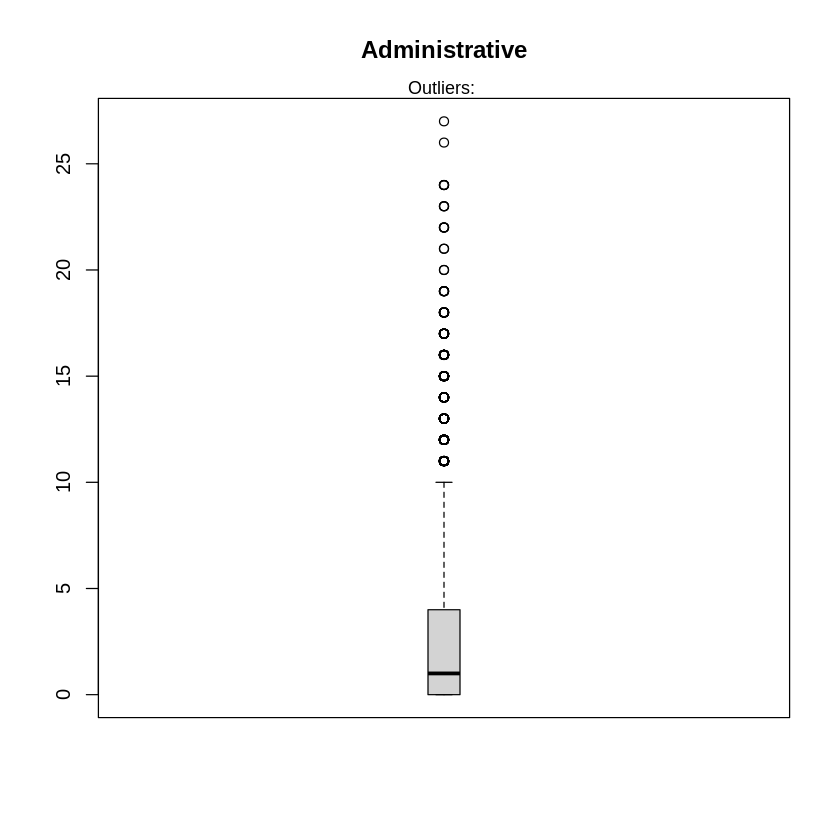

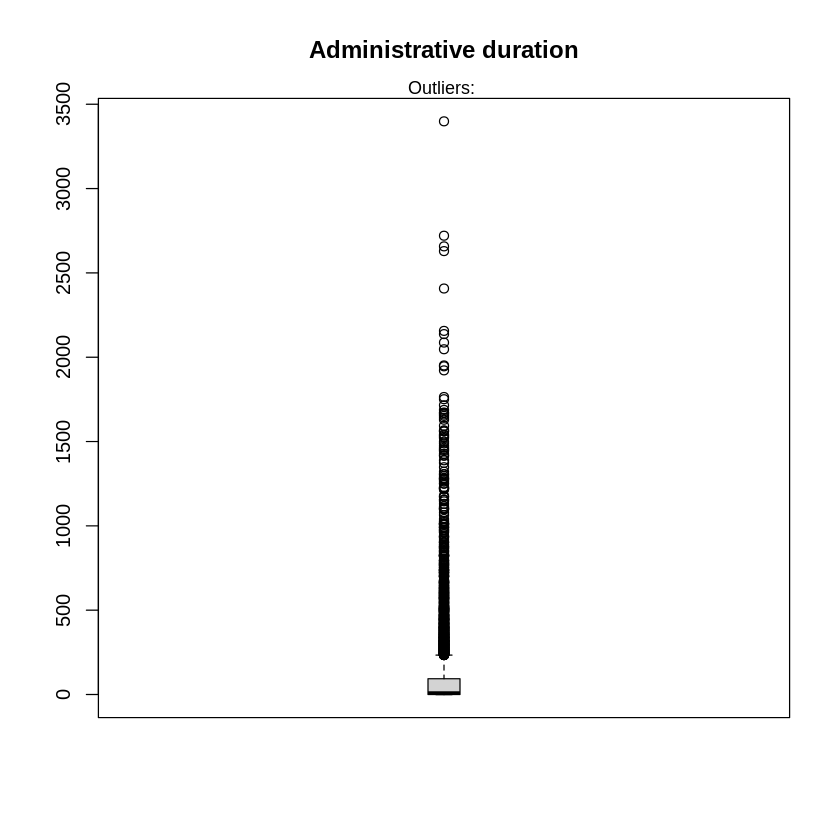

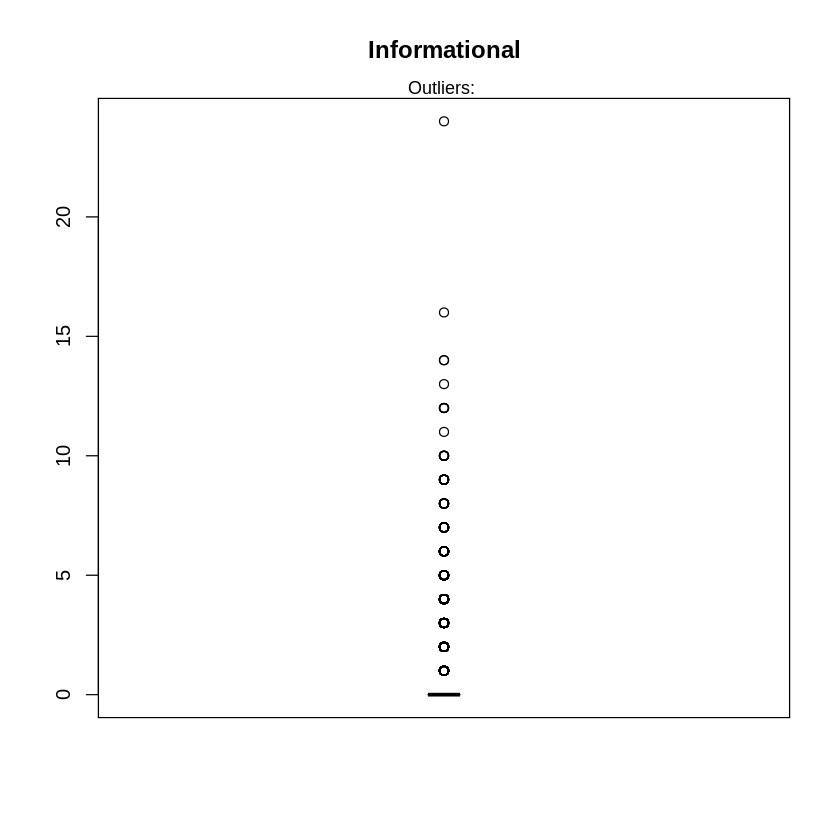

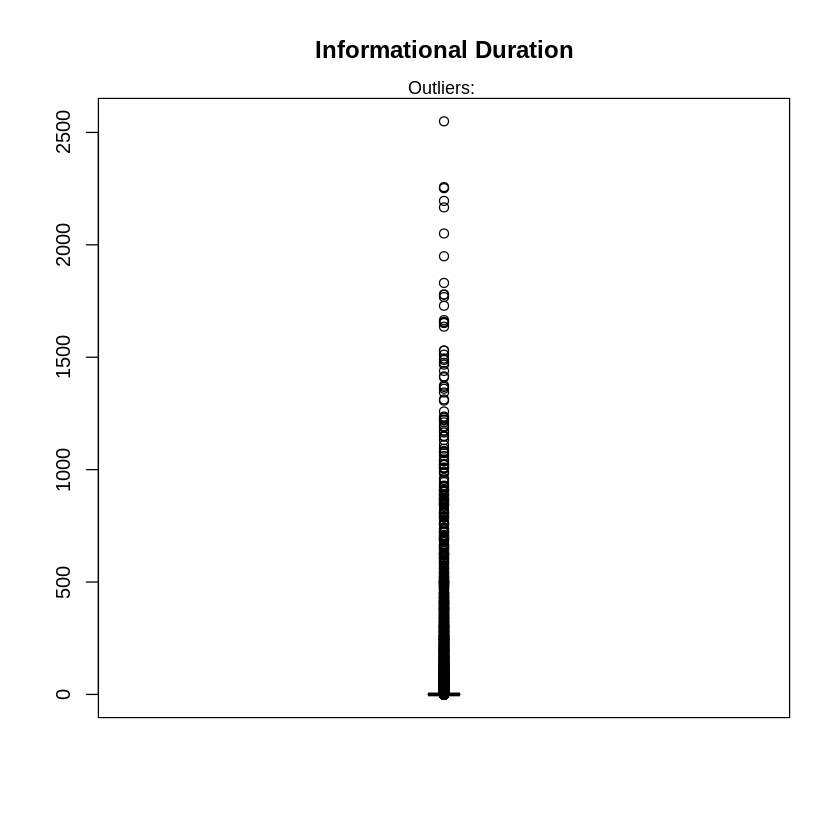

In [ ]:
# visualize any existing outliers using box plots
# Box plot for administrative
boxplot(shoppers$administrative, main="Administrative", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for administrative duration
boxplot(shoppers$administrative_duration, main="Administrative duration", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for informational
boxplot(shoppers$informational, main="Informational", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for informational duration
boxplot(shoppers$informational_duration, main="Informational Duration", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

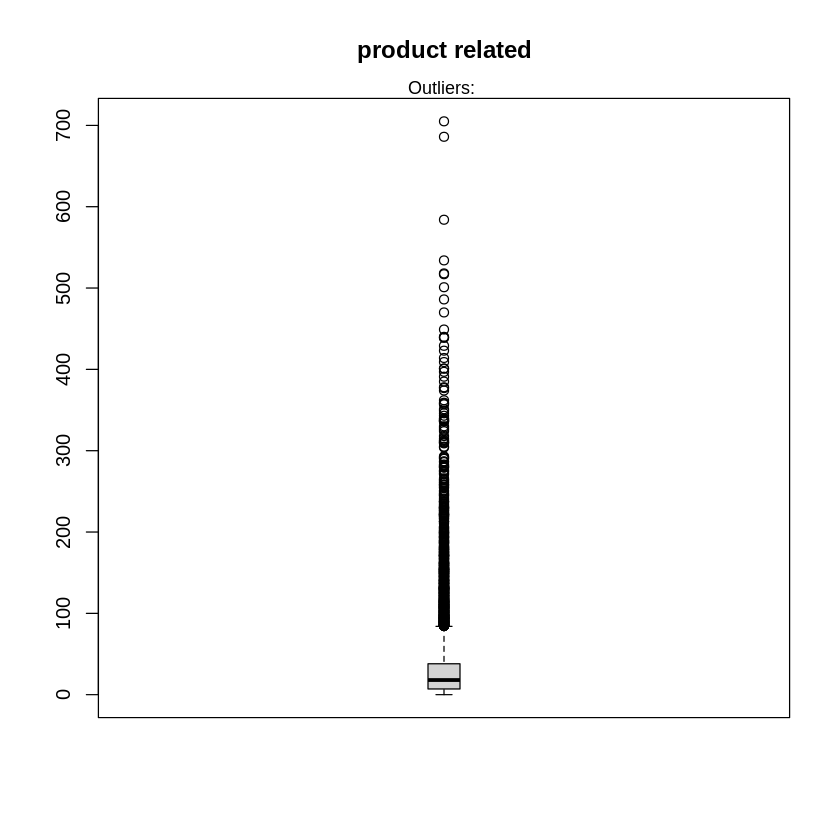

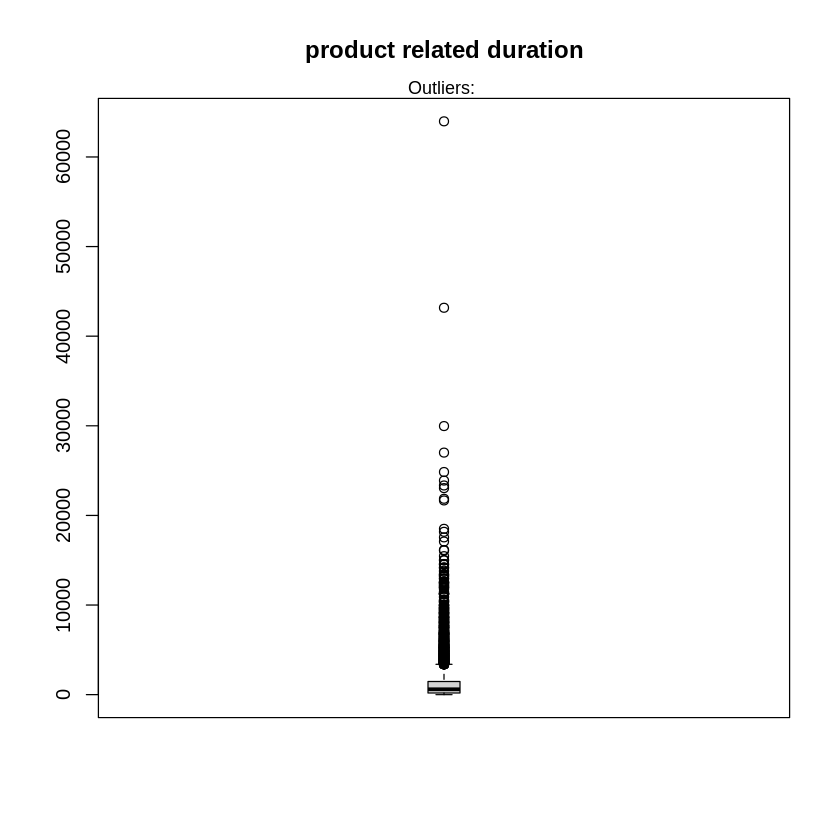

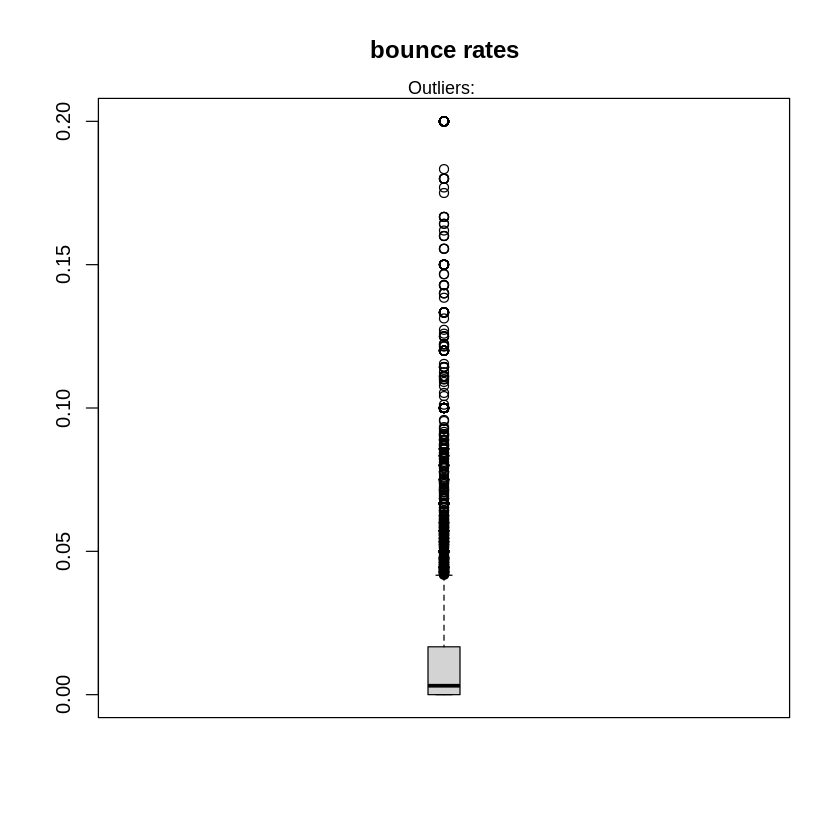

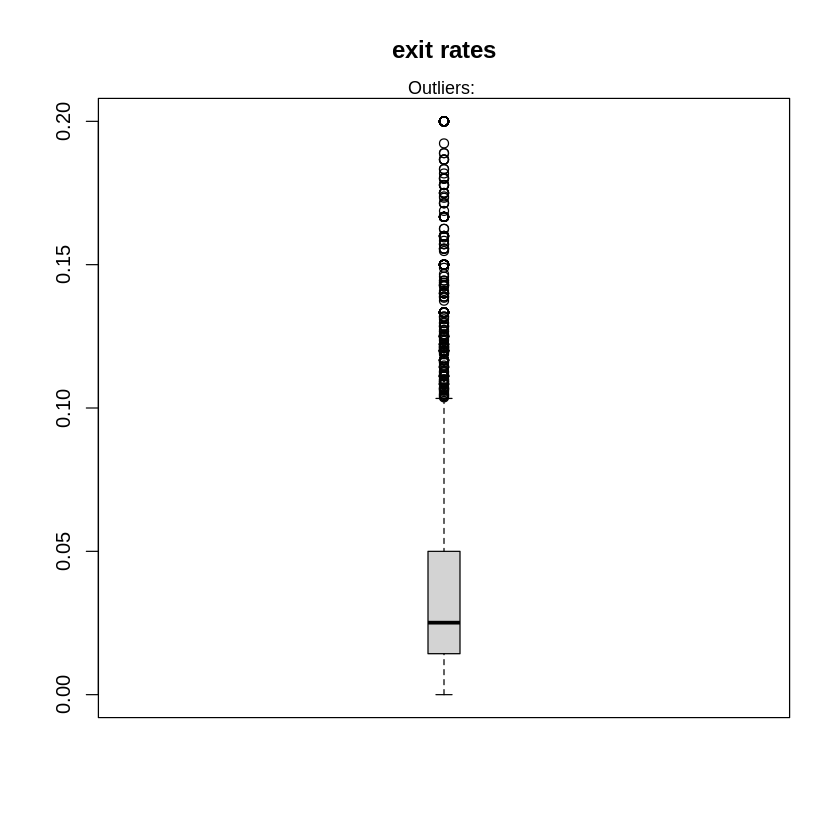

In [ ]:
# visualize any existing outliers using box plots
# Box plot for product related
boxplot(shoppers$productrelated, main="product related", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for product related duration
boxplot(shoppers$productrelated_duration, main="product related duration", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for bounce rates
boxplot(shoppers$bouncerates, main="bounce rates", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for exit rates
boxplot(shoppers$exitrates, main="exit rates", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

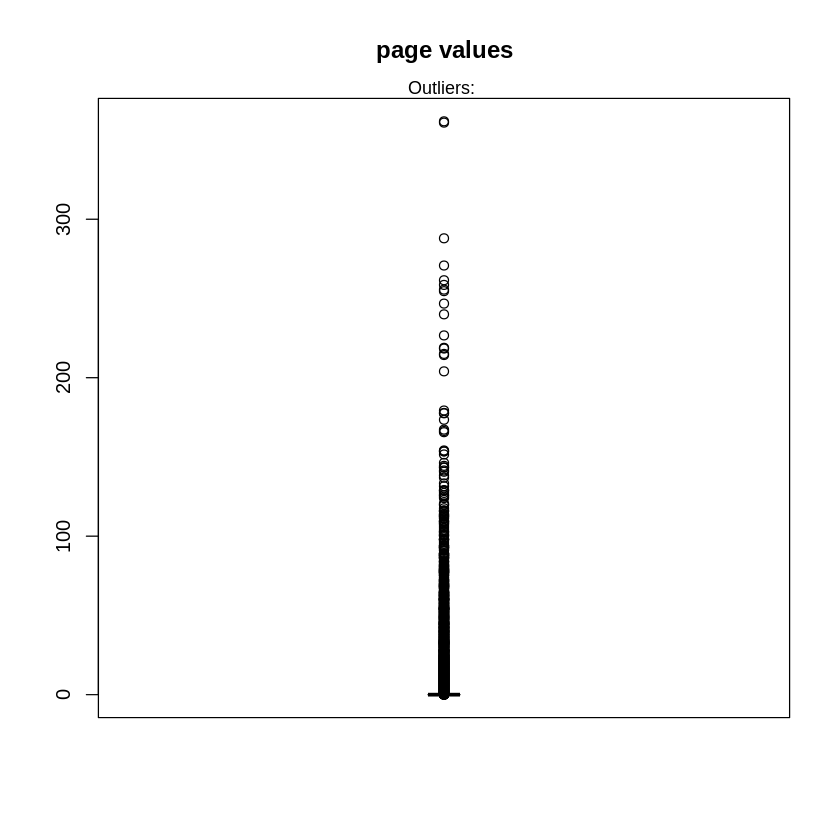

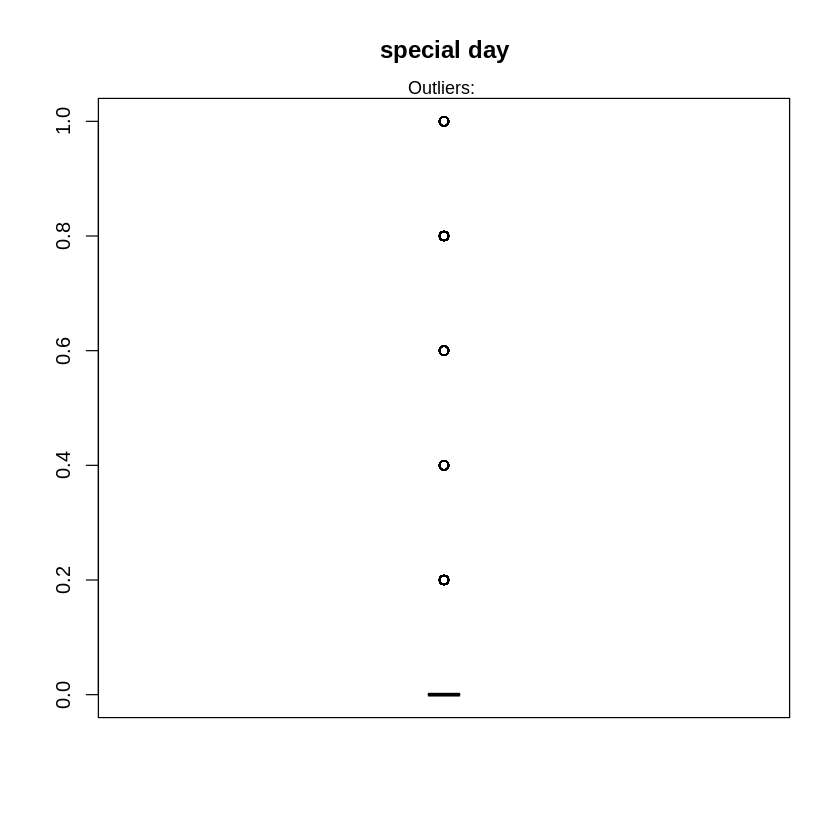

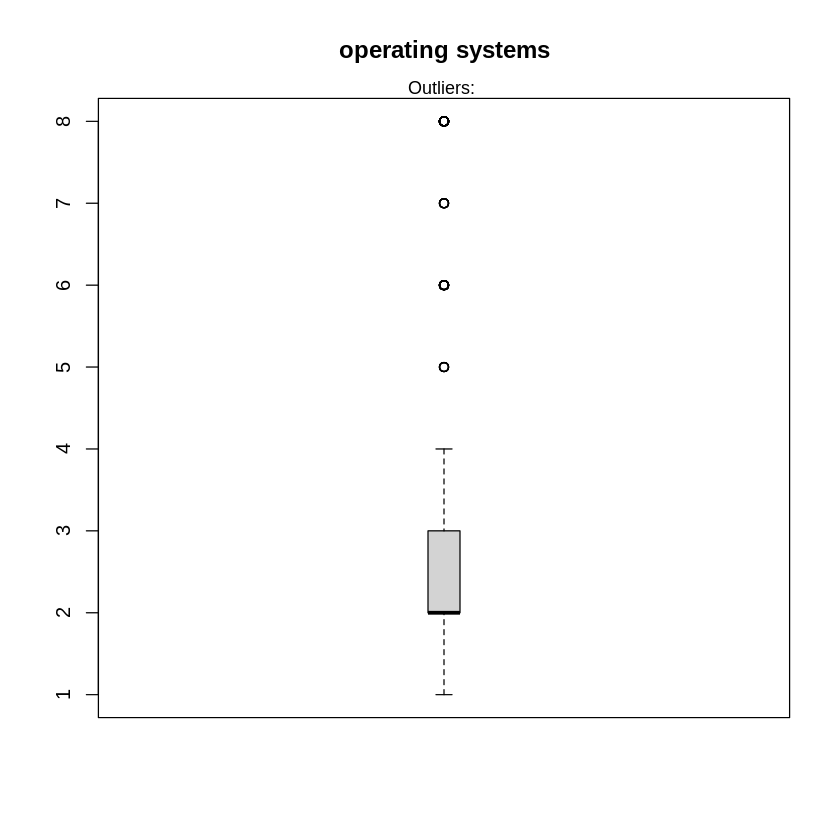

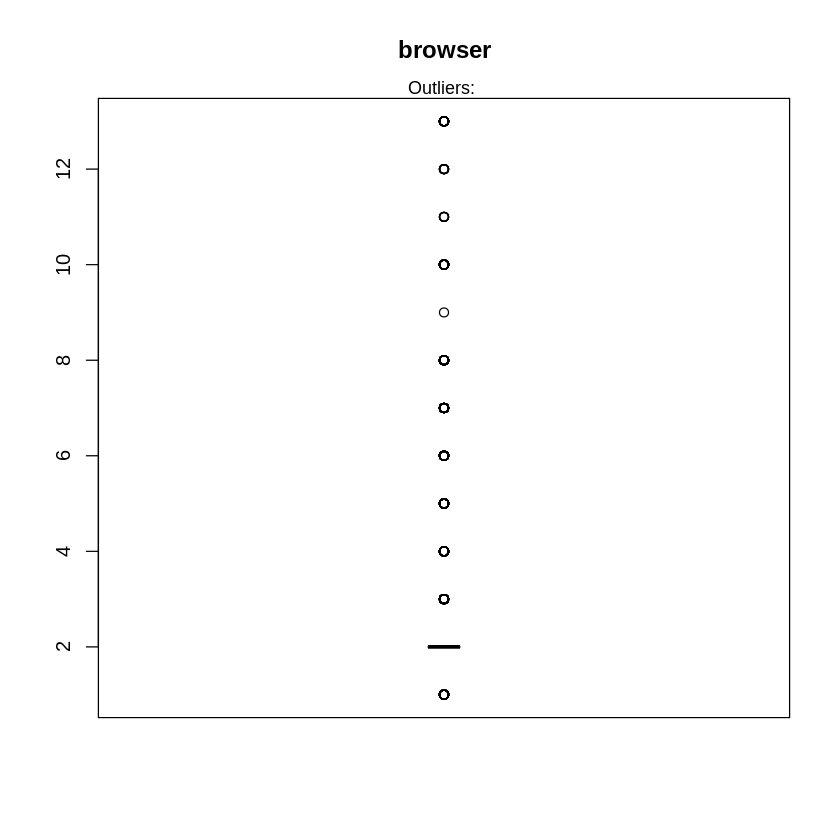

In [ ]:
# visualize any existing outliers using box plots
# Box plot for page values
boxplot(shoppers$pagevalues, main="page values", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for special day
boxplot(shoppers$specialday, main="special day", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for operating systems
boxplot(shoppers$operatingsystems, main="operating systems", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for browser
boxplot(shoppers$browser, main="browser", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

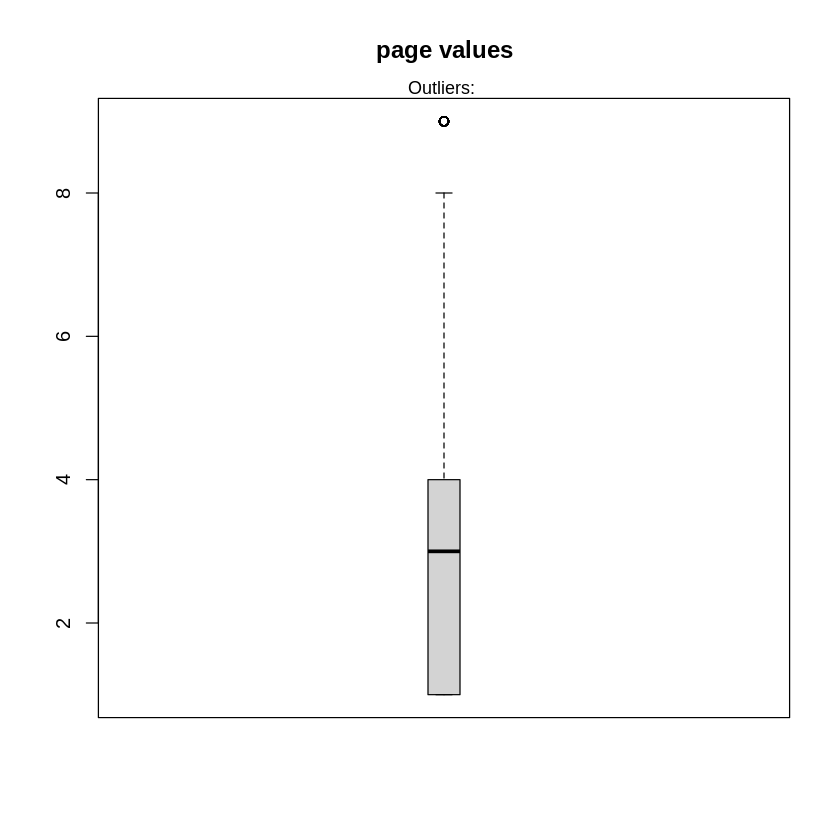

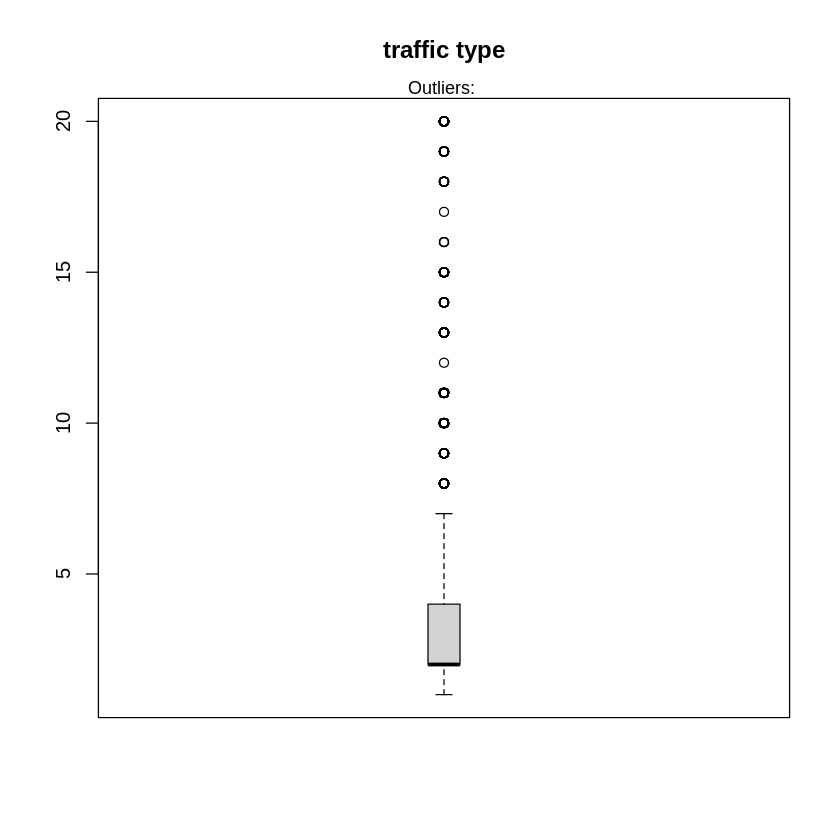

In [ ]:
# visualize any existing outliers using box plots
# Box plot for region
boxplot(shoppers$region, main="page values", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Box plot for traffic type
boxplot(shoppers$traffictype, main="traffic type", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

**Observation** : The data has outliers in most of the attributes.


In [ ]:
# outlier values
print("Outlier values in administrative:")
table(boxplot.stats(shoppers$administrative)$out)
print("Outlier values in administrative duration:")
table(boxplot.stats(shoppers$administrative_duration)$out)
print("Outlier values in informational:")
table(boxplot.stats(shoppers$informational)$out)
print("Outlier values in informational duration:")
table(boxplot.stats(shoppers$informational_duration)$out)
print("Outlier values in product related:")
table(boxplot.stats(shoppers$productrelated)$out)
print("Outlier values in productrelated duration:")
table(boxplot.stats(shoppers$productrelated_duration)$out)
print("Outlier values in bounce rates:")
table(boxplot.stats(shoppers$bouncerates)$out)
print("Outlier values in exit rates:")
table(boxplot.stats(shoppers$exitrates)$out)
print("Outlier values in page values:")
table(boxplot.stats(shoppers$pagevalues)$out)
print("Outlier values in special day:")
table(boxplot.stats(shoppers$specialday)$out)
print("Outlier values in operating systems:")
table(boxplot.stats(shoppers$operatingsystems)$out)
print("Outlier values in browser:")
table(boxplot.stats(shoppers$browser)$out)
print("Outlier values in region:")
table(boxplot.stats(shoppers$region)$out)
print("Outlier values in traffic type:")
table(boxplot.stats(shoppers$traffictype)$out)

[1] "Outlier values in administrative:"



 11  12  13  14  15  16  17  18  19  20  21  22  23  24  26  27 
105  86  56  44  38  24  16  12   6   2   2   4   3   4   1   1 

[1] "Outlier values in administrative duration:"



234.1666667       234.3 234.4333333 234.5666667 234.9285714         235 
          1           1           2           1           1           2 
235.1861702      235.25     235.625      235.75         236 236.0795455 
          1           1           1           1           1           1 
     236.25       236.4 236.4083333       236.5       236.8 236.8333333 
          1           1           1           1           1           1 
      236.9         237      237.25      237.35       237.5 237.8326007 
          1           1           2           1           3           1 
237.8333333      238.05     238.375       238.4 238.4666667 238.4833333 
          2           1           1           1           1           1 
238.5833333 238.6838095  238.775641 239.3333333       239.6 239.7445344 
          1           1           1           1           1           1 
239.8333333 239.9288462       240.1 240.1666667       240.2       240.8 
          1           1           1           1   

[1] "Outlier values in informational:"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   16   24 
1041  727  380  222   99   78   36   14   15    7    1    5    1    2    1    1 

[1] "Outlier values in informational duration:"



         -1           1         1.5           2         2.5           3 
         33           3           1          11           1          16 
        3.5           4           5         5.5           6 6.333333333 
          1          17          18           3          26           1 
        6.5           7         7.6 7.666666667           8         8.1 
          2          26           1           1          22           1 
8.166666667         8.5           9 9.307692308         9.5          10 
          1           2          33           1           4          26 
10.06666667 10.16666667        10.5 10.66666667          11        11.1 
          1           1           1           1          21           1 
       11.4        11.5          12       12.25        12.5 12.83333333 
          1           3          23           1           1           1 
         13        13.1       13.25        13.4        13.5 13.83333333 
         23           1           1           1   

[1] "Outlier values in product related:"



 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 
 28  14  15  15  22  17  18  10  20  18  19  15  15  19   9  10  14  11  12  12 
105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 
  6  14  13  13  13   9  17   7  12  12  11  11   8  10   5   9   4  12   4   7 
125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 
 10   7   7   7  10  10  13   9   8   5   4   4  11   4   5   7   8   3   4   3 
145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 
  6   6   3   4   7   6   5   8   3  11   5   4   5   1   7   3   4   8   1   4 
165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 
  1   2   4   2   2   3   7   4   2   3   3   4   1   3   4   2   3   3   1   2 
186 187 188 189 190 191 192 193 194 195 197 198 199 200 202 204 205 206 207 210 
  3   3   2   3   2   1   1   3   2   3   2   2   2   4   3   2   1   2   1   1 
211 213 216 217 218 219 220

[1] "Outlier values in productrelated duration:"



     3389.8  3391.68588 3393.903571 3394.130159 3395.729484 3397.957955 
          1           1           1           1           1           1 
3400.248897 3401.050687      3401.3 3408.266667 3410.697592    3410.875 
          1           1           1           1           1           1 
3411.955853 3413.833333    3414.875 3416.279167 3418.696975 3421.575758 
          1           1           1           1           1           1 
3421.653333    3422.525 3424.583333 3427.665476 3428.527381 3436.066667 
          1           1           1           1           1           1 
   3436.975 3439.733242 3441.439286 3441.806667   3445.0125 3451.751515 
          1           1           1           1           1           1 
  3452.2625 3457.285317 3457.628812 3459.479978 3466.794048 3472.870513 
          1           1           1           1           1           1 
3473.733333 3473.857143     3478.75 3480.811706 3484.233333 3484.269118 
          1           1           1           1   

[1] "Outlier values in bounce rates:"



0.041843972 0.041945289 0.042083333 0.042105263 0.042145594 0.042222222 
          1           1           1           4           1           1 
0.042528736 0.042553191 0.042592593 0.042666667 0.042857143 0.043181818 
          1           1           1           1          15           1 
0.043333333 0.043478261     0.04375 0.043851852       0.044 0.044047619 
          1           3           6           1           1           1 
0.044166667 0.044444444 0.044736842 0.044827586       0.045 0.045238095 
          1          28           1           1           2           1 
0.045307443 0.045356473 0.045454545 0.045833333 0.045977011 0.046153846 
          1           1           4           1           1           7 
0.046212121 0.046296296 0.046666667  0.04691358 0.046969697 0.047058824 
          1           1           1           1           1           6 
0.047222222 0.047479439 0.047619048 0.047777778  0.04781874       0.048 
          1           1           9           2   

[1] "Outlier values in exit rates:"



0.103703704 0.104081633 0.104242424 0.104545455 0.104761905       0.105 
          1           1           1           1           1           1 
0.105555556       0.106 0.106206897 0.106666667 0.107142857 0.108333333 
          1           1           1           4           2           8 
0.108558559 0.109090909  0.10952381        0.11 0.111111111 0.111538462 
          1           3           2           2          15           1 
0.111764706      0.1125 0.112903226 0.114285714 0.114814815 0.115789474 
          1           2           1           8           1           1 
      0.116 0.116666667     0.11875 0.119230769 0.119473684  0.11952381 
          1          14           1           1           1           1 
       0.12 0.120833333 0.121153846 0.121212121 0.121428571 0.121568627 
         23           3           1           1           2           1 
0.122222222 0.122427035 0.123412698 0.123809524 0.124444444       0.125 
          9           1           1           1   

[1] "Outlier values in page values:"



0.038034542 0.067049546 0.093546949 0.098621403 0.120699914 0.129676893 
          1           1           1           1           1           1 
0.131837013 0.139200623 0.150650498 0.152167439 0.154821253  0.17982681 
          1           1           1           1           1           1 
0.201663717 0.245152903  0.25272174 0.255191489  0.26809298 0.305312057 
          1           1           1           1           1           1 
0.335232374 0.384720286 0.408238132 0.447038663 0.468406088 0.513385987 
          1           1           1           1           1           1 
0.546128304 0.548811351 0.579785745     0.58275 0.602232815 0.624510388 
          1           1           1           1           1           1 
0.651781814 0.673127586 0.680988542  0.68291229 0.685335799 0.686565227 
          1           1           1           1           1           1 
0.700155006 0.702086761 0.714623214 0.720181023 0.742942737 0.761076259 
          1           1           1           1   

[1] "Outlier values in special day:"



0.2 0.4 0.6 0.8   1 
178 243 351 325 154 

[1] "Outlier values in operating systems:"



 5  6  7  8 
 6 19  7 79 

[1] "Outlier values in browser:"



   1    3    4    5    6    7    8    9   10   11   12   13 
2459  105  735  467  174   49  135    1  163    6   10   61 

[1] "Outlier values in region:"



  9 
511 

[1] "Outlier values in traffic type:"



  8   9  10  11  12  13  14  15  16  17  18  19  20 
343  42 450 247   1 737  13  37   3   1  10  17 198 

**Observation**: There are a number of outliers in the data however, for accurate analysis it is not suitable for them to be excluded in the data. This is to enable in drawing insights on when there were extremities and draw insights from them.

In [ ]:
# Checking for duplicates in the data set
duplicates <- shoppers[duplicated(shoppers),]
head(duplicates)
dim(duplicates)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE


[1] 117  18

**Observation**: There are duplicates in the data set.

In [ ]:
# removing the duplicates
shop_df <- shoppers[!duplicated(shoppers), ]

## Exploratory Data Analysis

In [ ]:
# Identifying numeric columns
numers <- unlist(lapply(shop_df, is.numeric))     
numers

administrative administrative_duration           informational 
                   TRUE                    TRUE                    TRUE 
 informational_duration          productrelated productrelated_duration 
                   TRUE                    TRUE                    TRUE 
            bouncerates               exitrates              pagevalues 
                   TRUE                    TRUE                    TRUE 
             specialday                   month        operatingsystems 
                   TRUE                   FALSE                    TRUE 
                browser                  region             traffictype 
                   TRUE                    TRUE                    TRUE 
            visitortype                 weekend                 revenue 
                  FALSE                   FALSE                   FALSE

In [ ]:
# Subset numeric columns of data
numers <- shop_df[ , numerics]                       
head(numers) 

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


In [ ]:
# getting the mean for all numeric columns
print("The mean of the numeric attributes:")
lapply(numers,FUN=mean)

[1] "The mean of the numeric attributes:"


$administrative
[1] 2.340028

$administrative_duration
[1] 81.68214

$informational
[1] 0.5088122

$informational_duration
[1] 34.83734

$productrelated
[1] 32.05845

$productrelated_duration
[1] 1207.508

$bouncerates
[1] 0.02044674

$exitrates
[1] 0.04149678

$pagevalues
[1] 5.9525

$specialday
[1] 0.06197229

$operatingsystems
[1] 2.124354

$browser
[1] 2.358144

$region
[1] 3.153291

$traffictype
[1] 4.074596

In [ ]:
# getting the median for all numeric columns
print("The median of the numeric attributes:")
lapply(numers,FUN=median)

[1] "The median of the numeric attributes:"


$administrative
[1] 1

$administrative_duration
[1] 9

$informational
[1] 0

$informational_duration
[1] 0

$productrelated
[1] 18

$productrelated_duration
[1] 609.5417

$bouncerates
[1] 0.002930403

$exitrates
[1] 0.025

$pagevalues
[1] 0

$specialday
[1] 0

$operatingsystems
[1] 2

$browser
[1] 2

$region
[1] 3

$traffictype
[1] 2

In [ ]:
# obtaining the mode for all numeric columns

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
print("The mode of the numeric attributes:")
lapply(numers,FUN=getmode)

[1] "The mode of the numeric attributes:"


$administrative
[1] 0

$administrative_duration
[1] 0

$informational
[1] 0

$informational_duration
[1] 0

$productrelated
[1] 1

$productrelated_duration
[1] 0

$bouncerates
[1] 0

$exitrates
[1] 0.2

$pagevalues
[1] 0

$specialday
[1] 0

$operatingsystems
[1] 2

$browser
[1] 2

$region
[1] 1

$traffictype
[1] 2

In [ ]:
# Calculating the minimum value for all numeric columns
print("The minimum values of the numeric attributes:")
lapply(numers,FUN=min)

[1] "The minimum values of the numeric attributes:"


$administrative
[1] 0

$administrative_duration
[1] -1

$informational
[1] 0

$informational_duration
[1] -1

$productrelated
[1] 0

$productrelated_duration
[1] -1

$bouncerates
[1] 0

$exitrates
[1] 0

$pagevalues
[1] 0

$specialday
[1] 0

$operatingsystems
[1] 1

$browser
[1] 1

$region
[1] 1

$traffictype
[1] 1

In [ ]:
# Calculating the maximum value for all numeric columns
print("The maximum values of the numeric attributes:")
lapply(numers,FUN=max)

[1] "The maximum values of the numeric attributes:"


$administrative
[1] 27

$administrative_duration
[1] 3398.75

$informational
[1] 24

$informational_duration
[1] 2549.375

$productrelated
[1] 705

$productrelated_duration
[1] 63973.52

$bouncerates
[1] 0.2

$exitrates
[1] 0.2

$pagevalues
[1] 361.7637

$specialday
[1] 1

$operatingsystems
[1] 8

$browser
[1] 13

$region
[1] 9

$traffictype
[1] 20

In [ ]:
# Calculating the range for all numeric columns
print("The range of the numeric attributes:")
lapply(numers,FUN=range)

[1] "The range of the numeric attributes:"


$administrative
[1]  0 27

$administrative_duration
[1]   -1.00 3398.75

$informational
[1]  0 24

$informational_duration
[1]   -1.000 2549.375

$productrelated
[1]   0 705

$productrelated_duration
[1]    -1.00 63973.52

$bouncerates
[1] 0.0 0.2

$exitrates
[1] 0.0 0.2

$pagevalues
[1]   0.0000 361.7637

$specialday
[1] 0 1

$operatingsystems
[1] 1 8

$browser
[1]  1 13

$region
[1] 1 9

$traffictype
[1]  1 20

In [ ]:
# getting the quantiles for all numeric columns
print("The quantile of the numeric attributes:")
lapply(numers,FUN=quantile)

[1] "The quantile of the numeric attributes:"


$administrative
  0%  25%  50%  75% 100% 
   0    0    1    4   27 

$administrative_duration
     0%     25%     50%     75%    100% 
  -1.00    0.00    9.00   94.75 3398.75 

$informational
  0%  25%  50%  75% 100% 
   0    0    0    0   24 

$informational_duration
      0%      25%      50%      75%     100% 
  -1.000    0.000    0.000    0.000 2549.375 

$productrelated
  0%  25%  50%  75% 100% 
   0    8   18   38  705 

$productrelated_duration
        0%        25%        50%        75%       100% 
   -1.0000   193.5833   609.5417  1477.5648 63973.5222 

$bouncerates
         0%         25%         50%         75%        100% 
0.000000000 0.000000000 0.002930403 0.016666667 0.200000000 

$exitrates
        0%        25%        50%        75%       100% 
0.00000000 0.01422258 0.02500000 0.04848485 0.20000000 

$pagevalues
      0%      25%      50%      75%     100% 
  0.0000   0.0000   0.0000   0.0000 361.7637 

$specialday
  0%  25%  50%  75% 100% 
   0    0    0    0    1 

$operatingsystems
  0%  25%  50%  75% 100% 
   1    2    2    3    8 

$browser
  0%  25%  50%  75% 100% 
   1    2    2    2   13 

$region
  0%  25%  50%  75% 100% 
   1    1    3    4    9 

$traffictype
  0%  25%  50%  75% 100% 
   1    2    2    4   20

In [ ]:
# getting the variance for all numeric columns
print("The variance of the numeric attributes:")
lapply(numers,FUN=var)

[1] "The variance of the numeric attributes:"


$administrative
[1] 11.09457

$administrative_duration
[1] 31516.25

$informational
[1] 1.62771

$informational_duration
[1] 20010.51

$productrelated
[1] 1989.241

$productrelated_duration
[1] 3686121

$bouncerates
[1] 0.002061387

$exitrates
[1] 0.0021388

$pagevalues
[1] 348.1132

$specialday
[1] 0.03988432

$operatingsystems
[1] 0.8226229

$browser
[1] 2.926075

$region
[1] 5.771712

$traffictype
[1] 16.12675

In [ ]:
# getting the standard deviation for all numeric columns
print("The standard deviation of the numeric attributes:")
lapply(numers,FUN=sd)

[1] "The standard deviation of the numeric attributes:"


$administrative
[1] 3.330851

$administrative_duration
[1] 177.5282

$informational
[1] 1.275817

$informational_duration
[1] 141.4585

$productrelated
[1] 44.60091

$productrelated_duration
[1] 1919.927

$bouncerates
[1] 0.0454025

$exitrates
[1] 0.04624716

$pagevalues
[1] 18.65779

$specialday
[1] 0.1997106

$operatingsystems
[1] 0.9069856

$browser
[1] 1.710578

$region
[1] 2.402439

$traffictype
[1] 4.015813

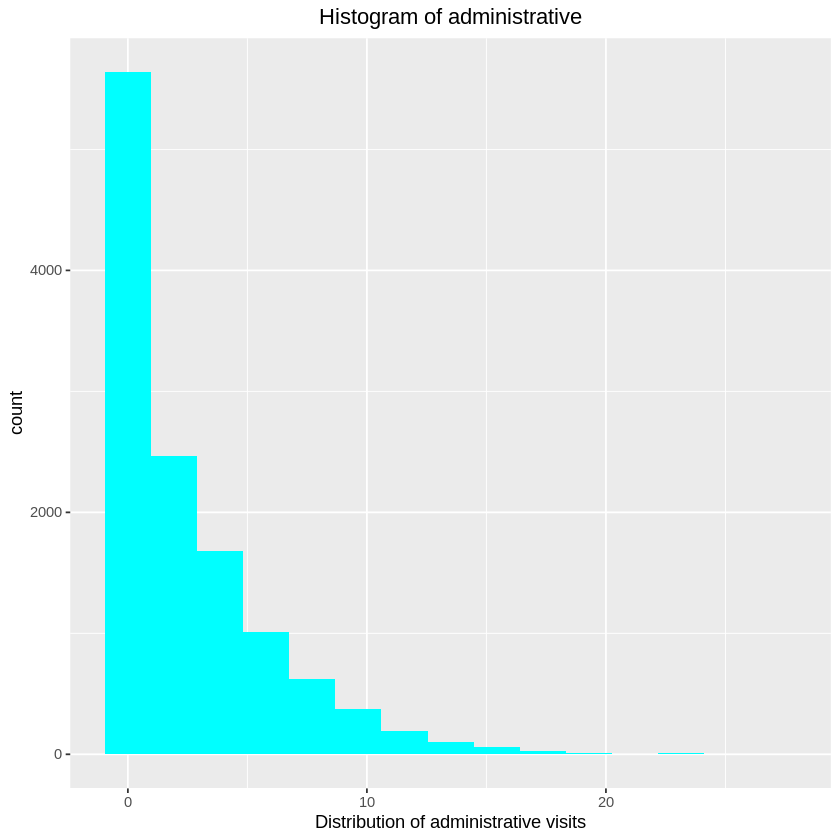

In [ ]:
# Histogram of administrative
library(tidyverse)
ggplot(data = numers, mapping = aes(x = administrative)) +
  geom_histogram(bins = 15, fill = "cyan") +
  labs(x = "Distribution of administrative visits") +
  ggtitle("Histogram of administrative") +
  theme(plot.title = element_text(hjust = 0.5))

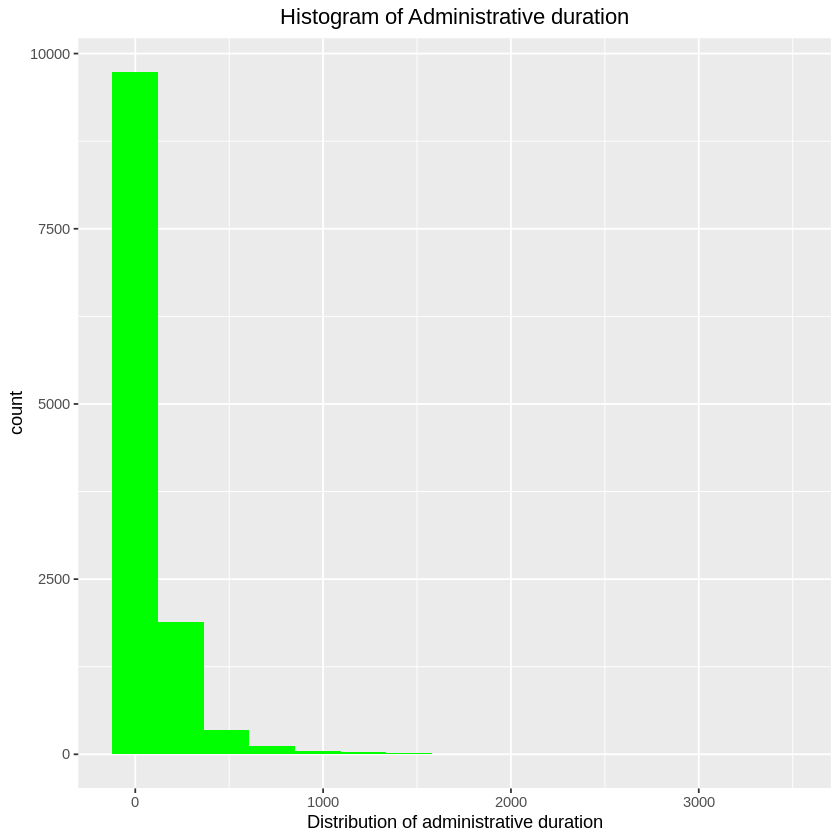

In [ ]:
# Histogram of administrative duration
ggplot(data = numers, mapping = aes(x = administrative_duration)) +
  geom_histogram(bins = 15, fill = "green") +
  labs(x = "Distribution of administrative duration") +
  ggtitle("Histogram of Administrative duration") +
  theme(plot.title = element_text(hjust = 0.5))

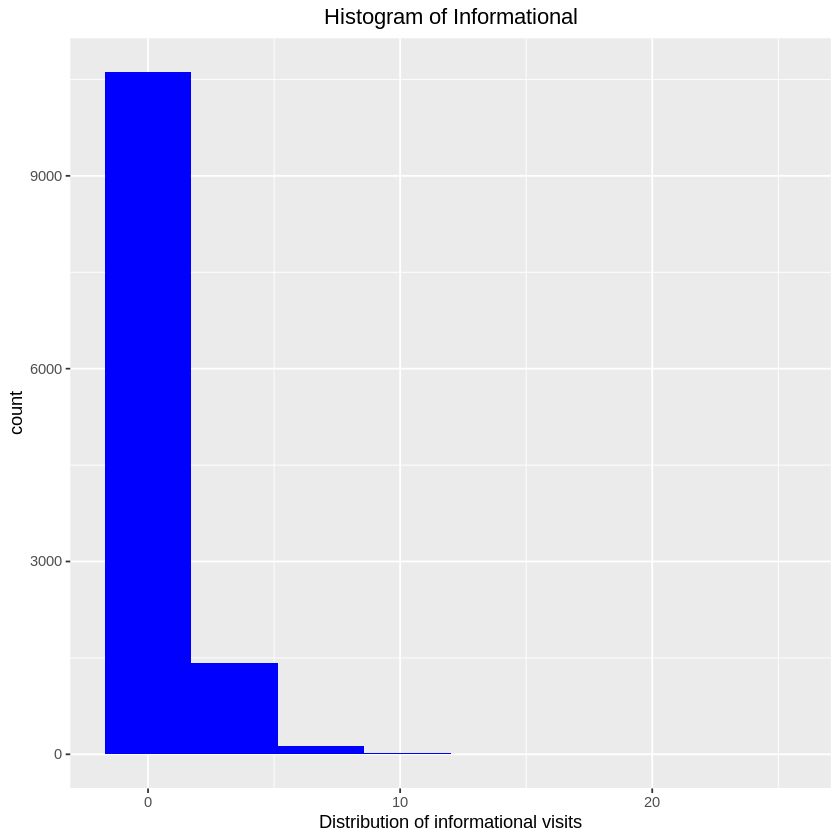

In [ ]:
# Histogram of informational
ggplot(data = numers, mapping = aes(x = informational)) +
  geom_histogram(bins = 8, fill = "blue") +
  labs(x = "Distribution of informational visits") +
  ggtitle("Histogram of Informational") +
  theme(plot.title = element_text(hjust = 0.5))

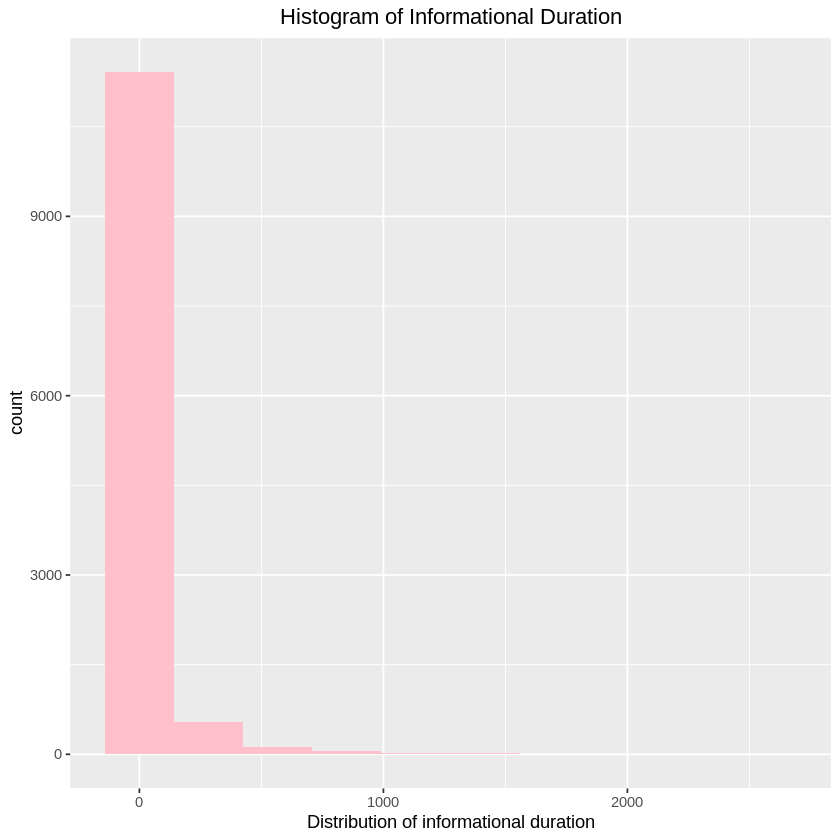

In [ ]:
# Histogram of informational duration
ggplot(data = numers, mapping = aes(x = informational_duration)) +
  geom_histogram(bins = 10, fill = "pink") +
  labs(x = "Distribution of informational duration") +
  ggtitle("Histogram of Informational Duration") +
  theme(plot.title = element_text(hjust = 0.5))

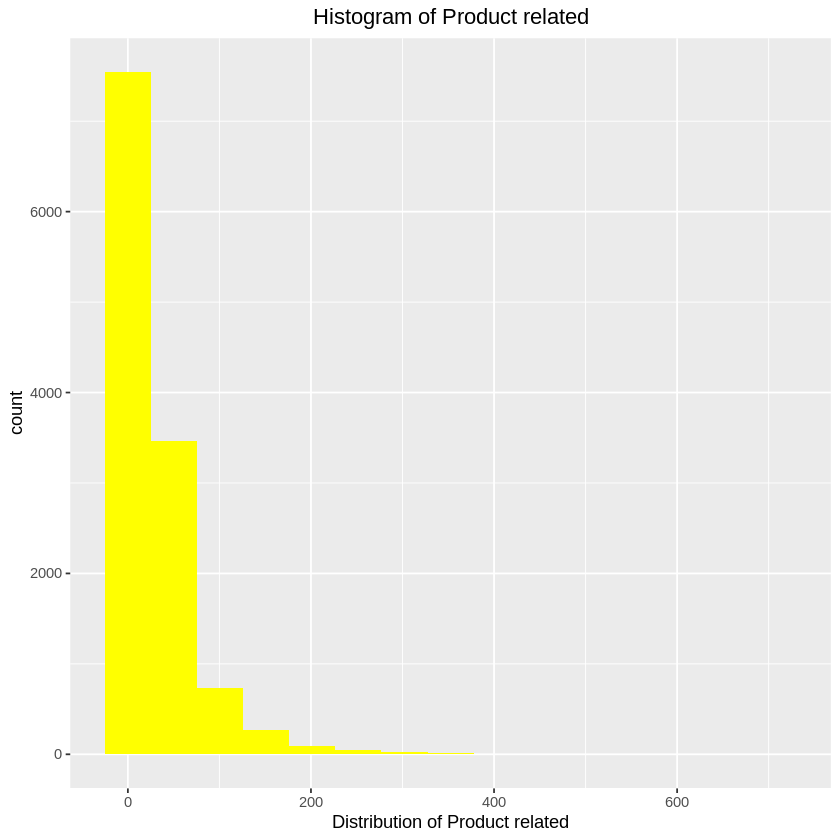

In [ ]:
# Histogram of Age
ggplot(data = numers, mapping = aes(x = productrelated)) +
  geom_histogram(bins = 15, fill = "yellow") +
  labs(x = "Distribution of Product related") +
  ggtitle("Histogram of Product related") +
  theme(plot.title = element_text(hjust = 0.5))

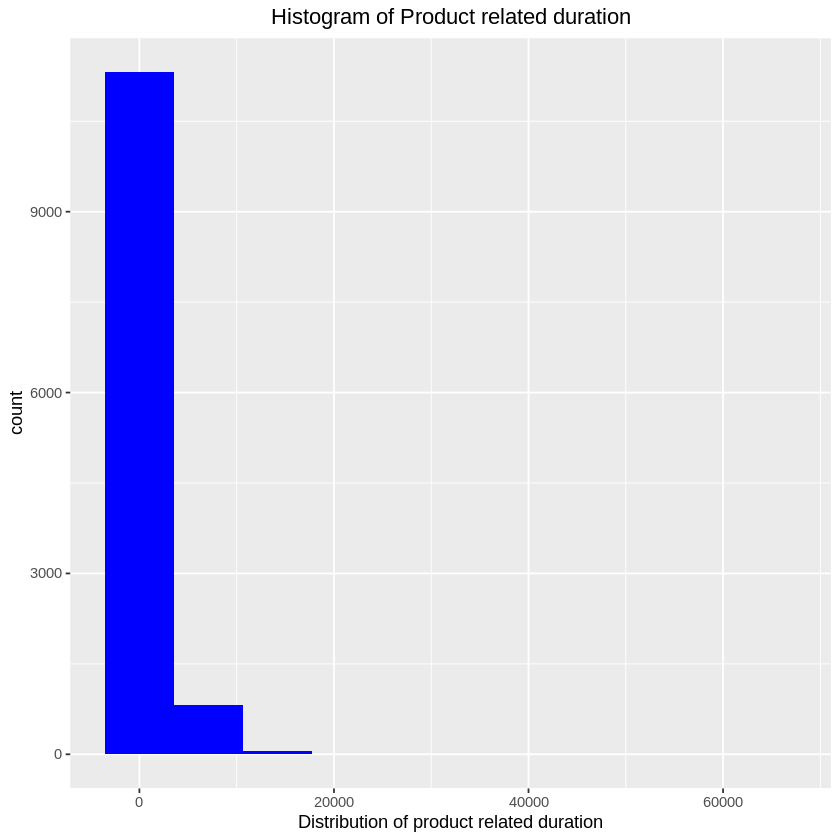

In [ ]:
# Histogram of product related duration
ggplot(data = numers, mapping = aes(x = productrelated_duration)) +
  geom_histogram(bins = 10, fill = "blue") +
  labs(x = "Distribution of product related duration") +
  ggtitle("Histogram of Product related duration") +
  theme(plot.title = element_text(hjust = 0.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



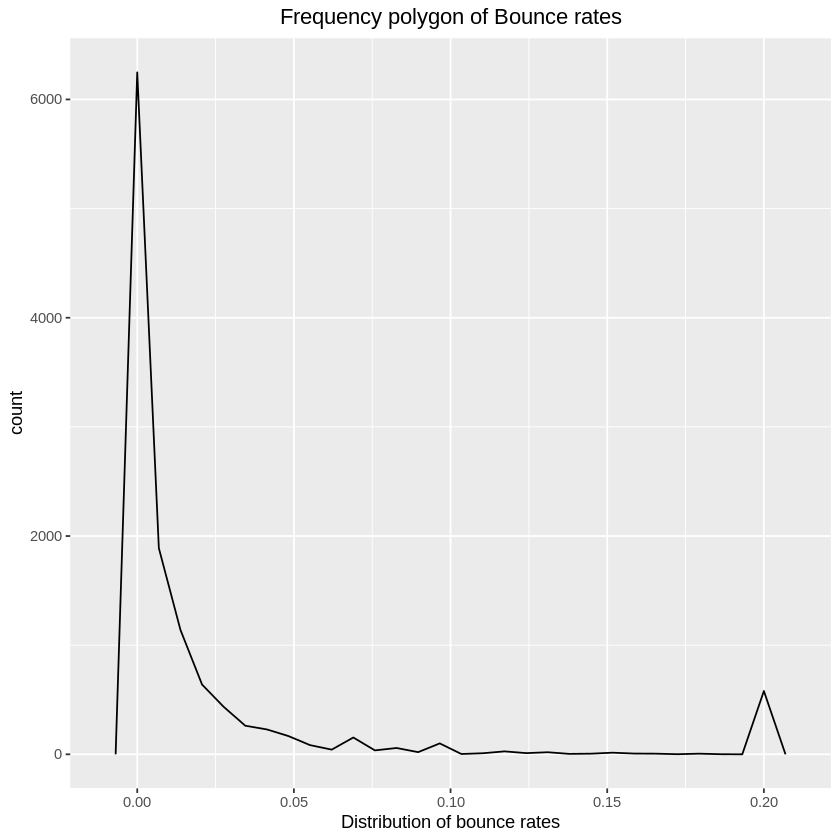

In [ ]:
# Frequency polygon of bounce rates
ggplot(data = numers, mapping = aes(x = bouncerates),  stat_bin(10)) + geom_freqpoly( ) + 
  labs(x = "Distribution of bounce rates") +
  ggtitle("Frequency polygon of Bounce rates") +
  theme(plot.title = element_text(hjust = 0.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



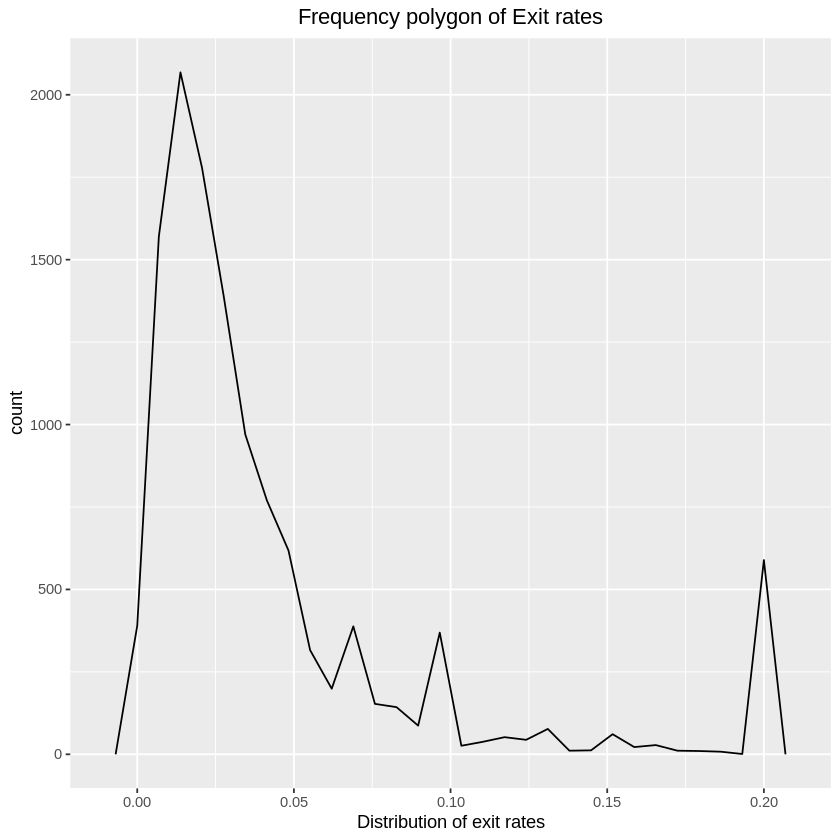

In [ ]:
# frequency polygon of exit rates
ggplot(data = numers, mapping = aes(x = exitrates),  stat_bin(10)) + geom_freqpoly( ) + 
  labs(x = "Distribution of exit rates") +
  ggtitle("Frequency polygon of Exit rates") +
  theme(plot.title = element_text(hjust = 0.5))

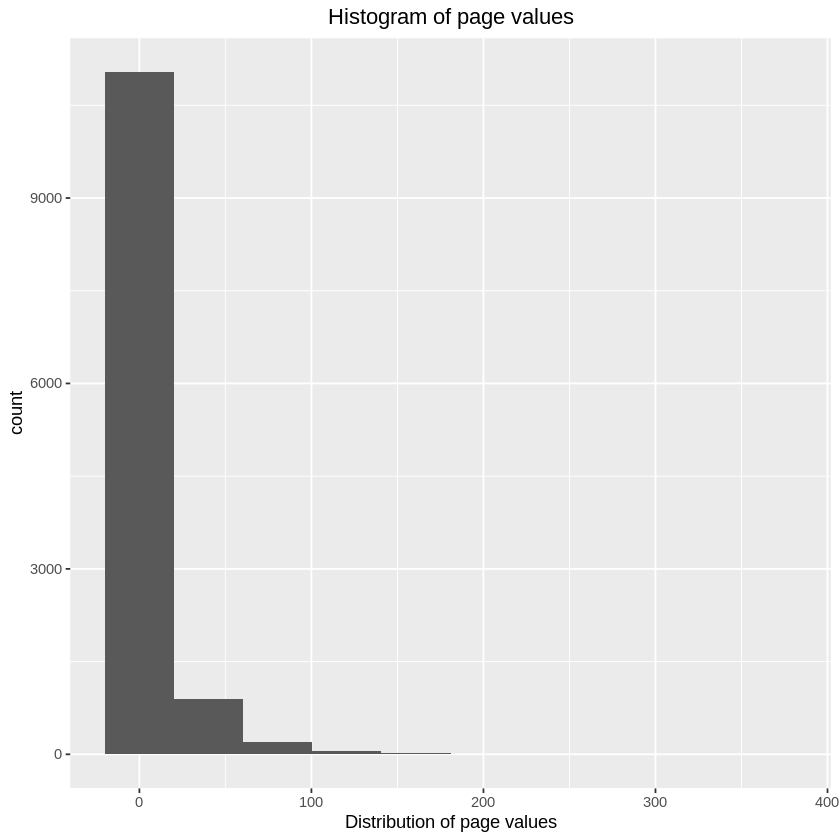

In [ ]:
# Histogram of bounce rates
ggplot(data = numers, mapping = aes(x = pagevalues)) + geom_histogram(bins= 10 ) + 
  labs(x = "Distribution of page values") +
  ggtitle("Histogram of page values") +
  theme(plot.title = element_text(hjust = 0.5))

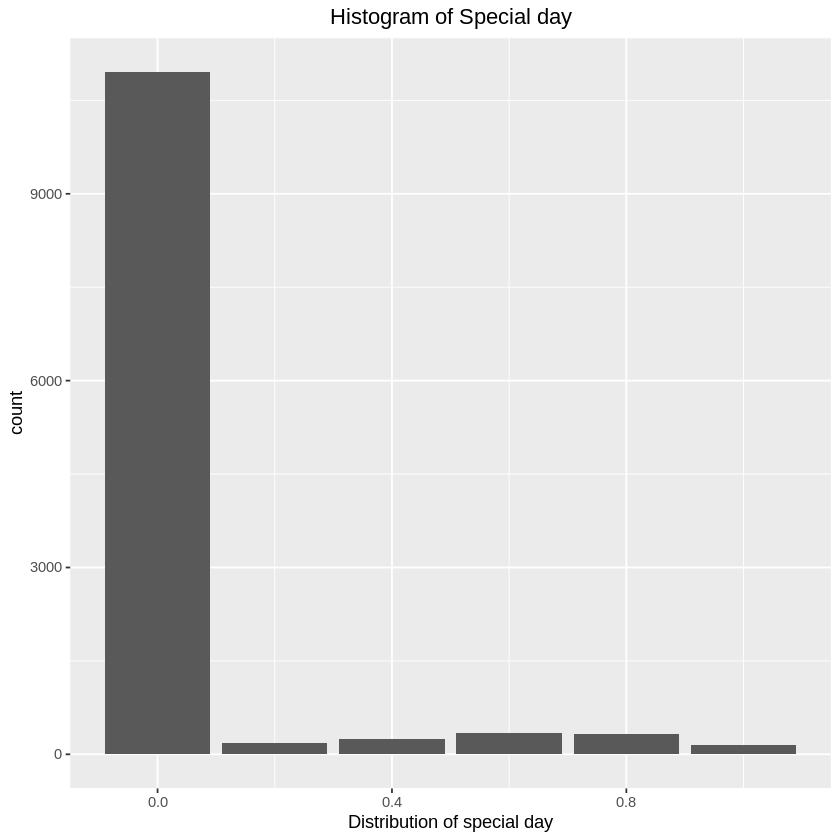

In [ ]:
# Histogram of bounce rates
ggplot(data = numers, mapping = aes(x = specialday)) + geom_bar( ) + 
  labs(x = "Distribution of special day") +
  ggtitle("Histogram of Special day") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: There were more visits on days that were not special.

In [ ]:
# summary count of operating systems
table(numers$operatingsystems)


   1    2    3    4    5    6    7    8 
2548 6536 2530  478    6   19    7   75 

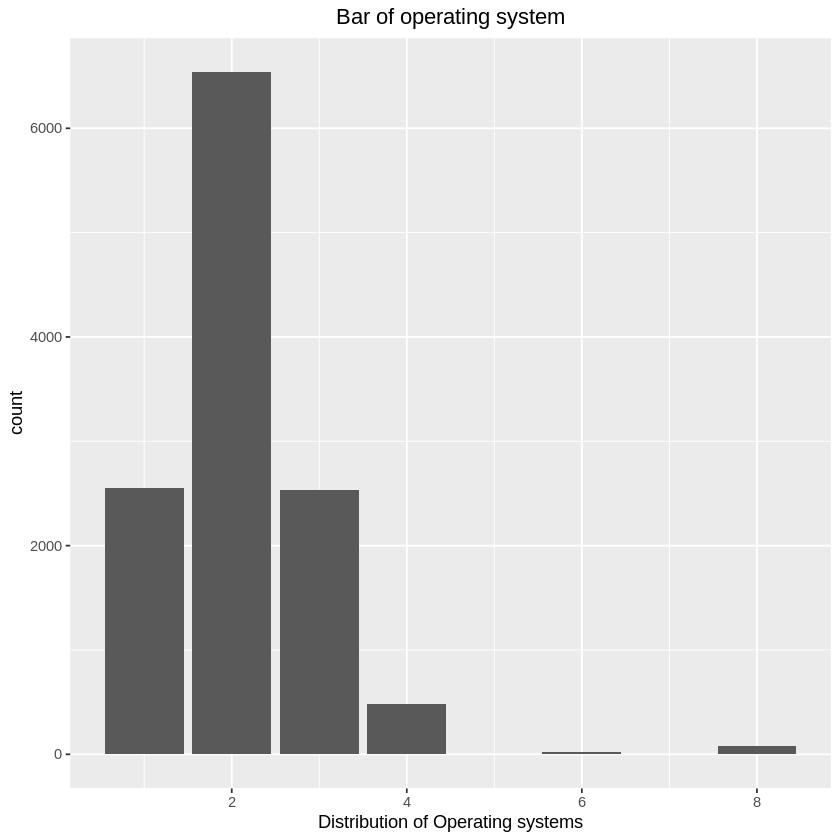

In [ ]:
# Bar graph  of operating system
ggplot(data = numers, mapping = aes(x = operatingsystems),  stat_bin(10)) + geom_bar( ) + ggtitle("Bar of operating system") +
  labs(x = "Distribution of Operating systems") +
  theme(plot.title = element_text(hjust = 0.5))


**Observation**: Most of the pages had two operating systems

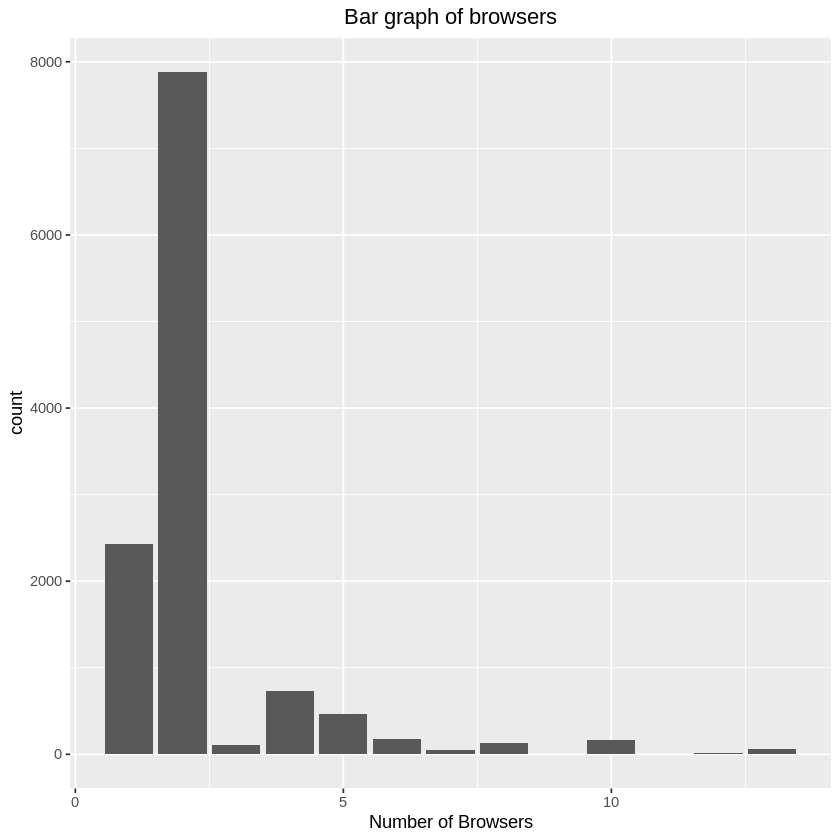

In [ ]:
# Bar graph  of browser
ggplot(data = numers, mapping = aes(x = browser),  stat_bin(10)) + geom_bar( ) + ggtitle("Bar graph of browsers") +
  labs(x = "Number of Browsers") +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# summary count of the number of browsers
table(numers$browser)


   1    2    3    4    5    6    7    8    9   10   11   12   13 
2426 7878  105  730  466  174   49  135    1  163    6   10   56 

**Observation**: Most had two browsers.

In [ ]:
# summary counts of the regions from which the users came from
table(numers$region)


   1    2    3    4    5    6    7    8    9 
4711 1127 2382 1168  317  800  758  431  505 

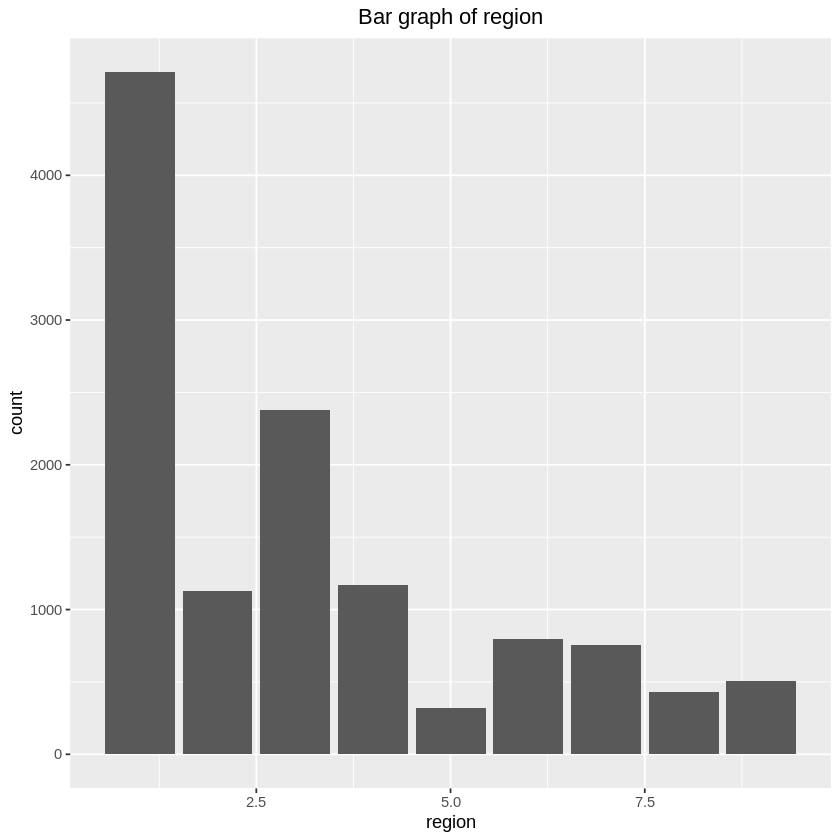

In [ ]:
# Bar graph  of region
ggplot(data = numers, mapping = aes(x = region),  stat_bin(10)) + geom_bar( ) + ggtitle("Bar graph of region") +
  labs(x = "region") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Region 1 had the most number of online shoppers visiting the different sites.

In [ ]:
# summary counts of traffic types
table(numers$traffictype)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2383 3907 2017 1066  260  443   40  343   41  450  247    1  728   13   36    3 
  17   18   19   20 
   1   10   17  193 

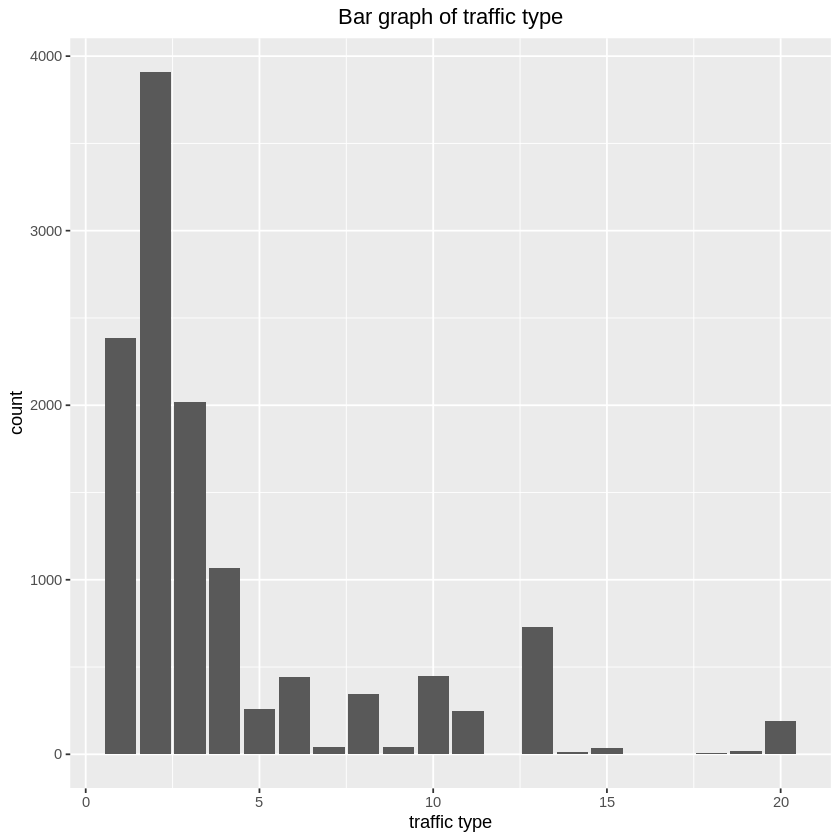

In [ ]:
# Bar graph  of traffic type
ggplot(data = numers, mapping = aes(x = traffictype),  stat_bin(10)) + geom_bar( ) + ggtitle("Bar graph of traffic type") +
  labs(x = "traffic type") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Most of the regions had traffic type level 2

In [ ]:
# summary count of visitor type
table(shop_df$visitortype)


      New_Visitor             Other Returning_Visitor 
             1693                81             10425 

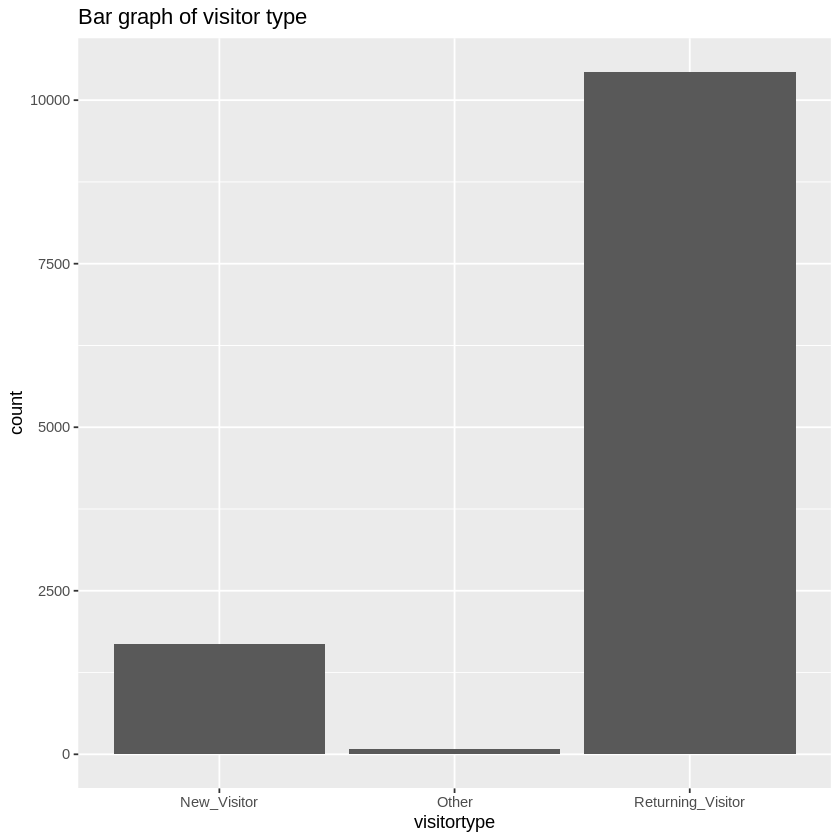

In [ ]:
# visuals for illustrating of visitor type
v <- ggplot(shop_df, aes(x = visitortype))
v + geom_bar()+ ggtitle("Bar graph of visitor type")

**Observation**: Most visitor in the different types of pages were returning visitors.

In [ ]:
# summary count of the weekend visits
table(shop_df$weekend)


FALSE  TRUE 
 9343  2856 

**Observation**: Most of the visits were not during the weekend.

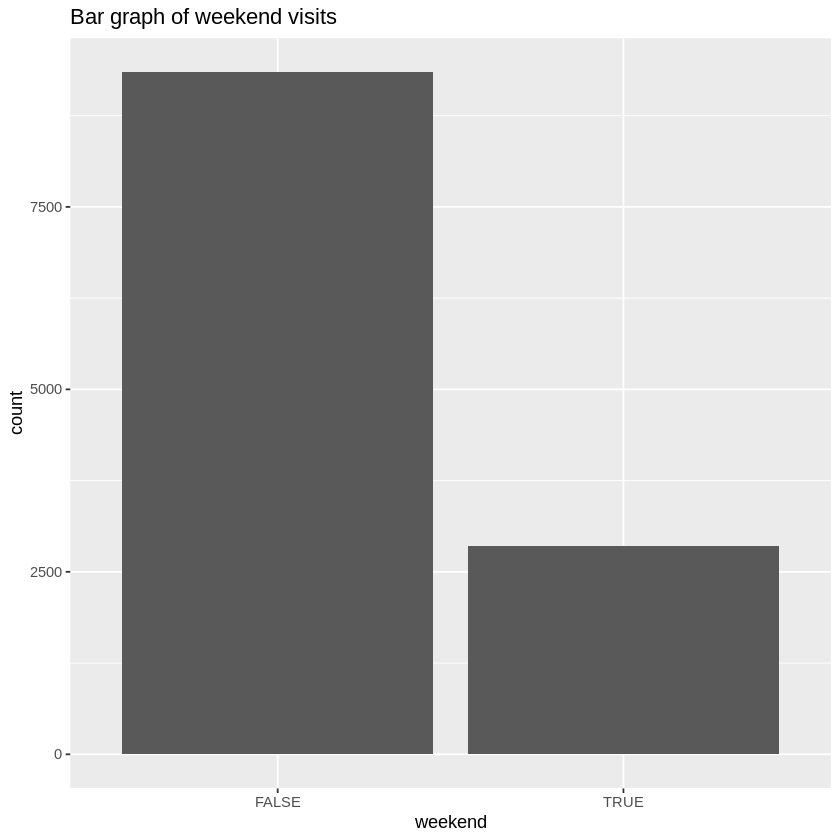

In [ ]:
# visuals for illustrating of weekend visits to sites
w <- ggplot(shop_df, aes(x = weekend))
w + geom_bar()+ ggtitle("Bar graph of weekend visits")

In [ ]:
# summary count of the revenue received
table(shop_df$revenue)


FALSE  TRUE 
10291  1908 

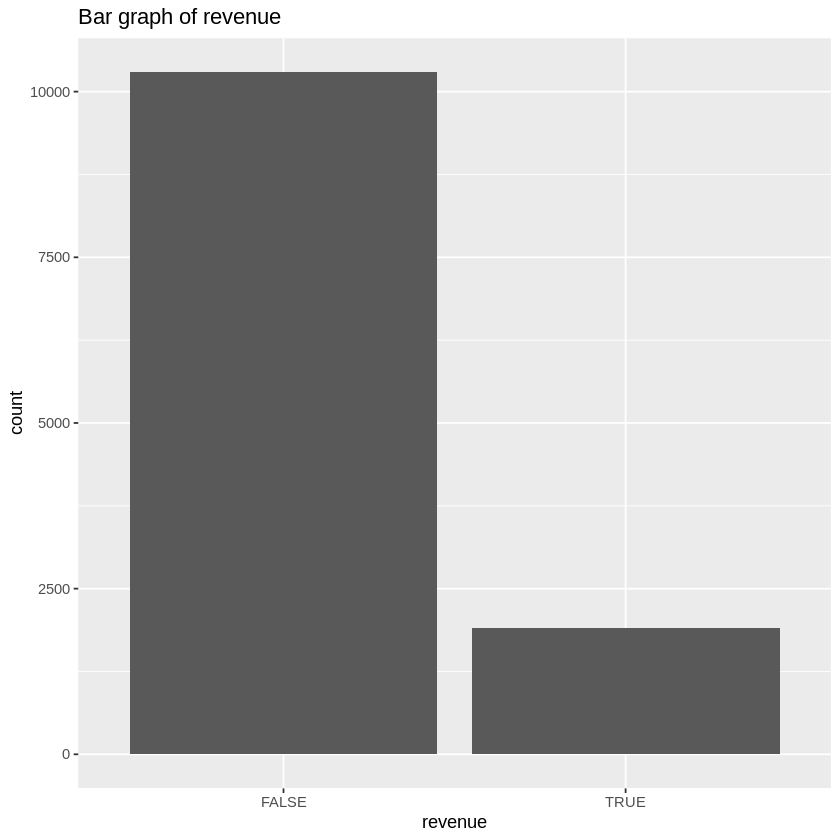

In [ ]:
# visuals for illustrating revenue
r <- ggplot(shop_df, aes(x = revenue))
r + geom_bar()+ ggtitle("Bar graph of revenue")

**Observation**: Most of the site did not give any revenue.

In [ ]:
# summary counts of visits in the different months
table(shop_df$month)


 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1706  182  432  285 1853 3328 2983  549  448 

**Observation**: Most of the visits in the different sites occured in the month of may.

## Bivariate Analysis

In [ ]:
# calculating correlation
correlation <- cor(numers)
correlation

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
administrative,1.000000000,0.600409653,0.37528761,0.254786021,0.428191515,0.371027224,-0.213666635,-0.311274132,0.09692097,-0.097072098,-0.006697922,-0.025763658,-0.007262053,-0.03478413
administrative_duration,0.600409653,1.000000000,0.30143630,0.237189860,0.286783914,0.353513793,-0.137333397,-0.202024452,0.06616837,-0.074736885,-0.007610715,-0.015833675,-0.006723711,-0.01507502
informational,0.375287611,0.301436296,1.00000000,0.618677947,0.372604721,0.386083717,-0.109505298,-0.159566815,0.04739015,-0.049376774,-0.009625870,-0.038766808,-0.030477323,-0.03518669
informational_duration,0.254786021,0.237189860,0.61867795,1.000000000,0.279061948,0.346580691,-0.070159472,-0.102932678,0.03006416,-0.031293040,-0.009749983,-0.019609349,-0.027920098,-0.02516357
productrelated,0.428191515,0.286783914,0.37260472,0.279061948,1.000000000,0.860308186,-0.193515772,-0.286163211,0.05411549,-0.025930622,0.004090351,-0.013706213,-0.040106501,-0.04434433
productrelated_duration,0.371027224,0.353513793,0.38608372,0.346580691,0.860308186,1.000000000,-0.174375499,-0.245334012,0.05084062,-0.038210652,0.002775788,-0.007838332,-0.034862498,-0.03750694
bouncerates,-0.213666635,-0.137333397,-0.10950530,-0.070159472,-0.193515772,-0.174375499,1.000000000,0.903358192,-0.11599198,0.087839995,0.026839839,-0.016018380,0.001432015,0.08919904
exitrates,-0.311274132,-0.202024452,-0.15956681,-0.102932678,-0.286163211,-0.245334012,0.903358192,1.000000000,-0.17357154,0.116783762,0.016482012,-0.003565541,-0.001837556,0.08738623
pagevalues,0.096920968,0.066168365,0.04739015,0.030064160,0.054115494,0.050840624,-0.115991977,-0.173571542,1.00000000,-0.064532709,0.018583782,0.045845065,0.010590868,0.01223694
specialday,-0.097072098,-0.074736885,-0.04937677,-0.031293040,-0.025930622,-0.038210652,0.087839995,0.116783762,-0.06453271,1.000000000,0.012757766,0.003465984,-0.016452464,0.05282794


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



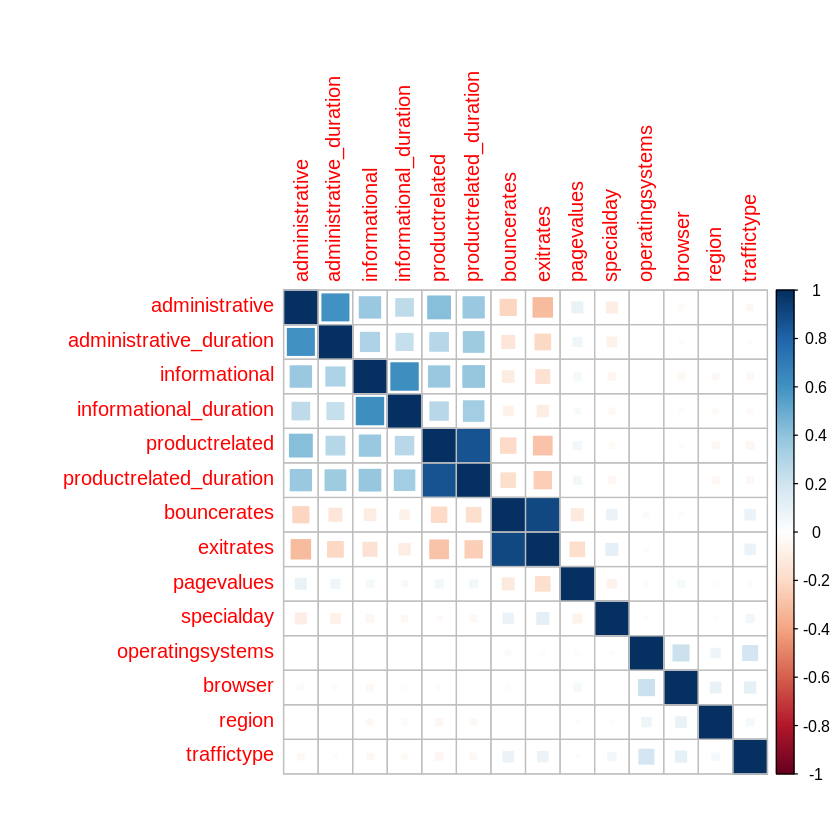

In [ ]:
# creating correlation plot
install.packages("corrplot")
library(corrplot)
corrplot(correlation, method="square")

**Observation**: Significant corelation relationships to take note are:
  * administrative vs administrative duration
  * informational vs informational duration
  * product related vs product related duration
  * exit rate and bounce rate

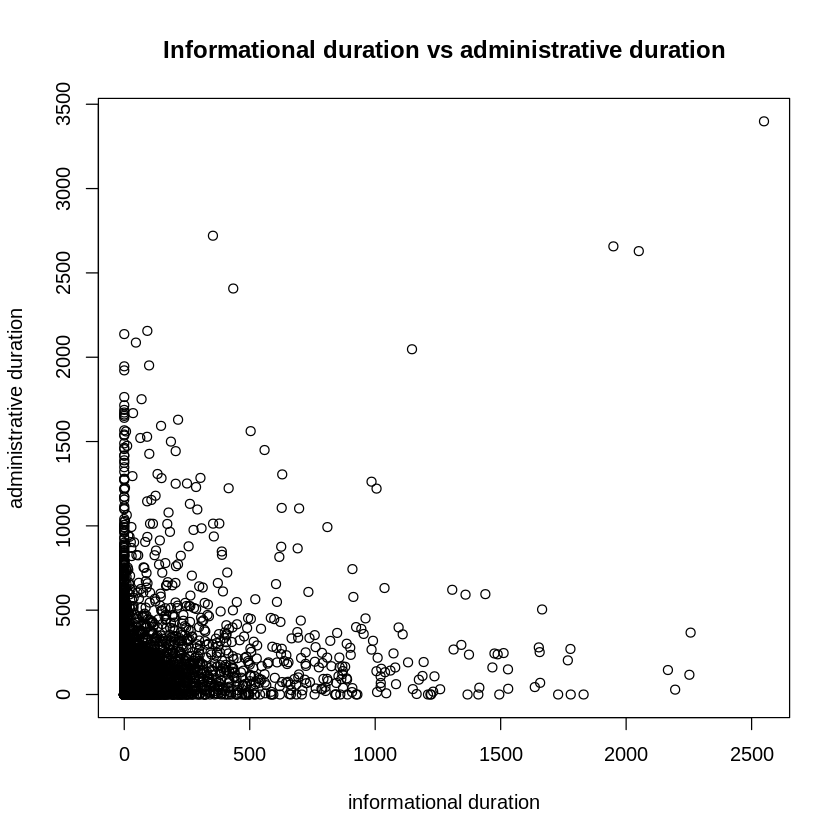

In [ ]:
# plotting a  simple scatter plot to illustrate the relationship between the informational duration and administrative duration
plot(shop_df$informational_duration,shop_df$administrative_duration, xlab="informational duration", ylab="administrative duration", main="Informational duration vs administrative duration")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



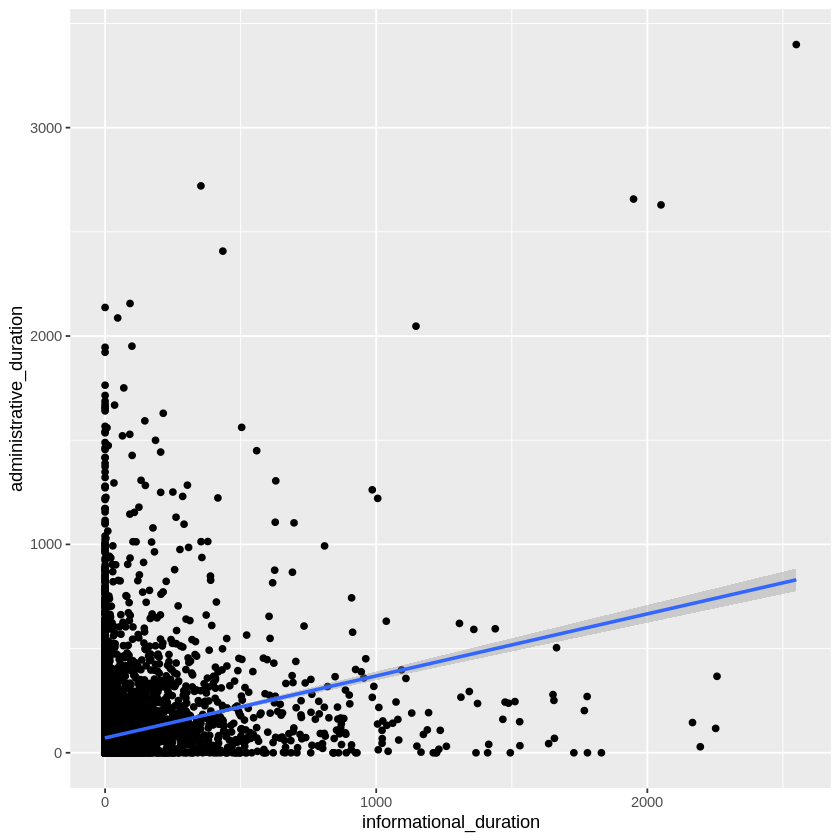

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



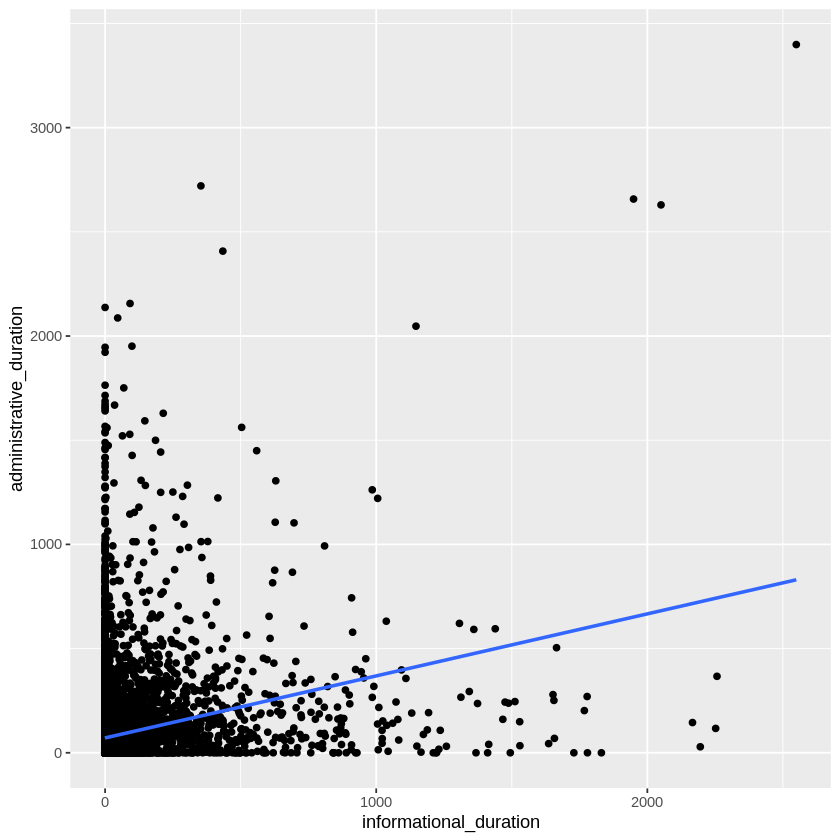

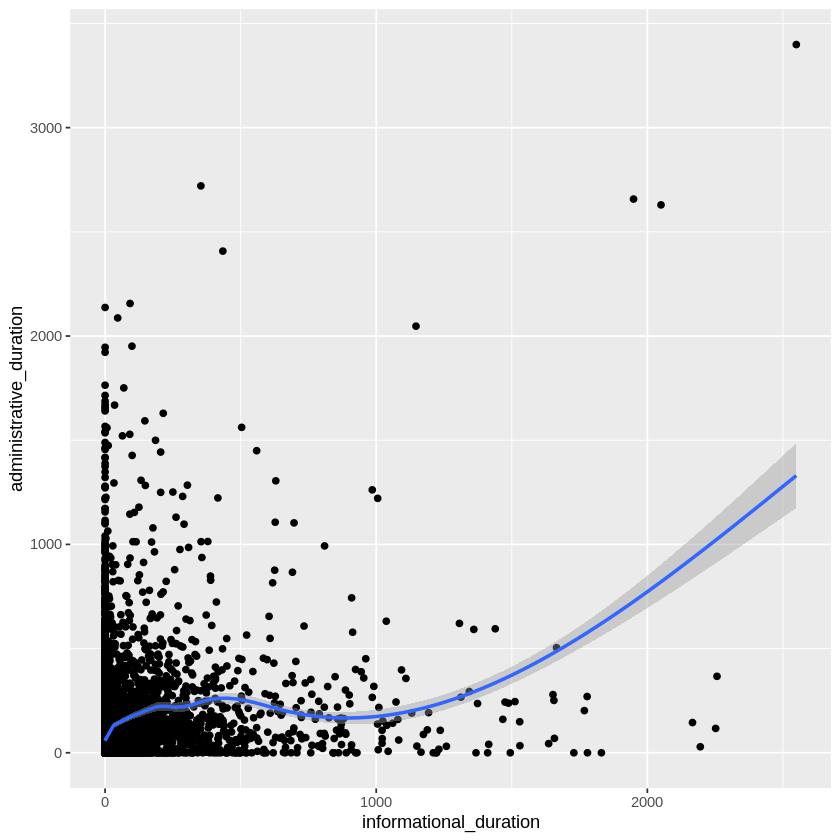

In [ ]:
# plotting scatter plots together with the best line of fit to show the relationship between informational duration and administative duration
# Add the regression line
ggplot(shop_df, aes(x=informational_duration, y=administrative_duration)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(shop_df, aes(x=informational_duration, y=administrative_duration)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(shop_df, aes(x=informational_duration, y=administrative_duration)) + 
  geom_point()+
  geom_smooth()

**Observation**: The relationship between the informational duration and the administrative duration is relatively weak and the line of best fit is linear.


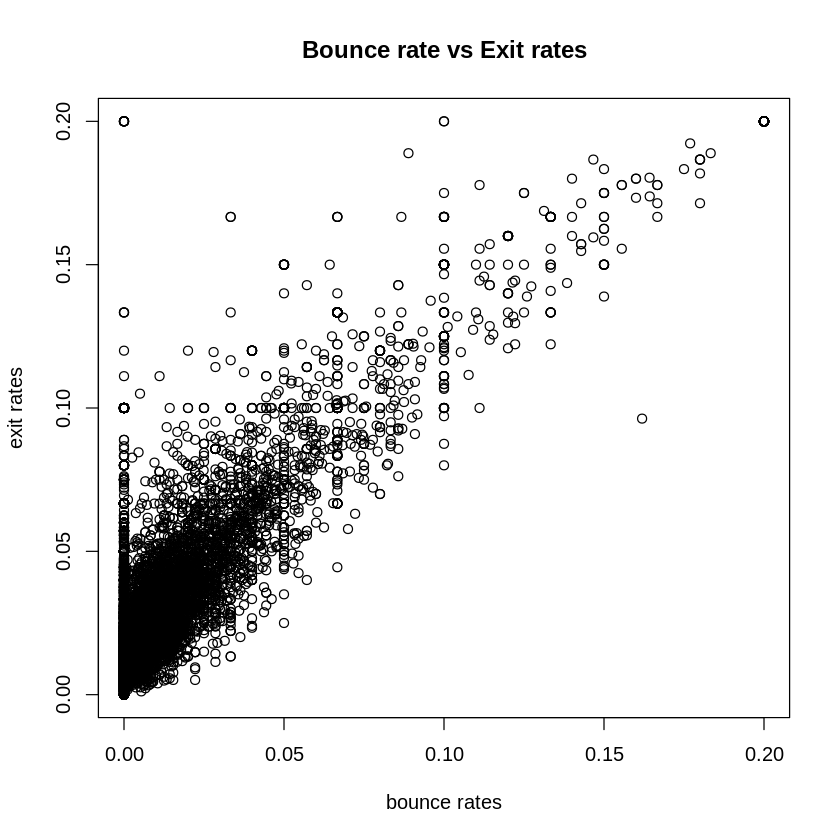

In [ ]:
# plotting a  simple scatter plot to illustrate the relationship between bounce rate and exit rates
plot(shop_df$bouncerates,shop_df$exitrates, xlab="bounce rates", ylab="exit rates", main="Bounce rate vs Exit rates")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



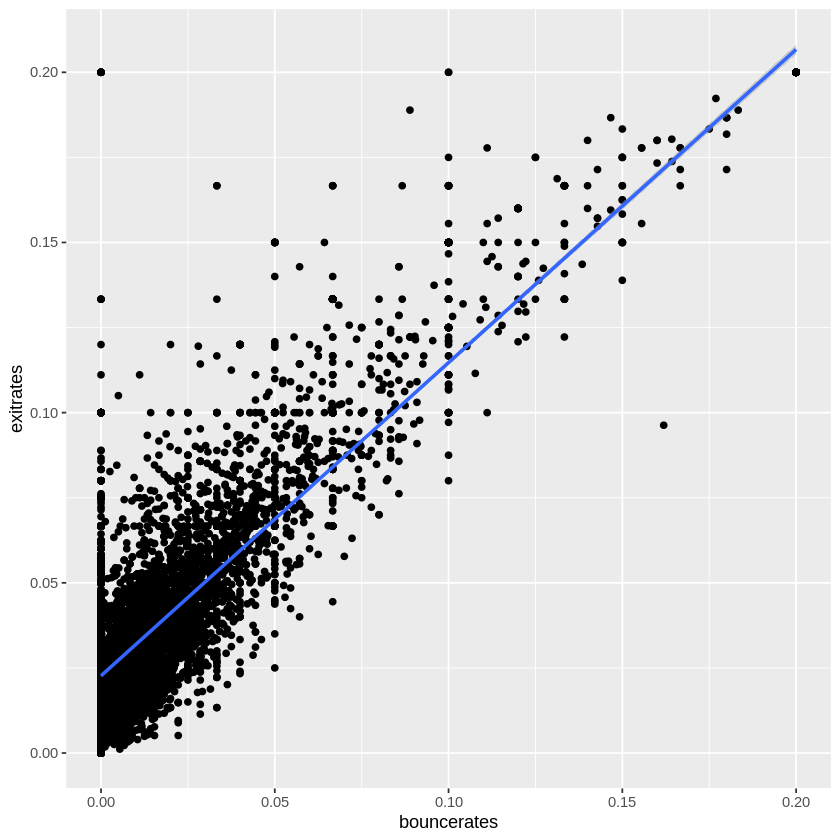

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



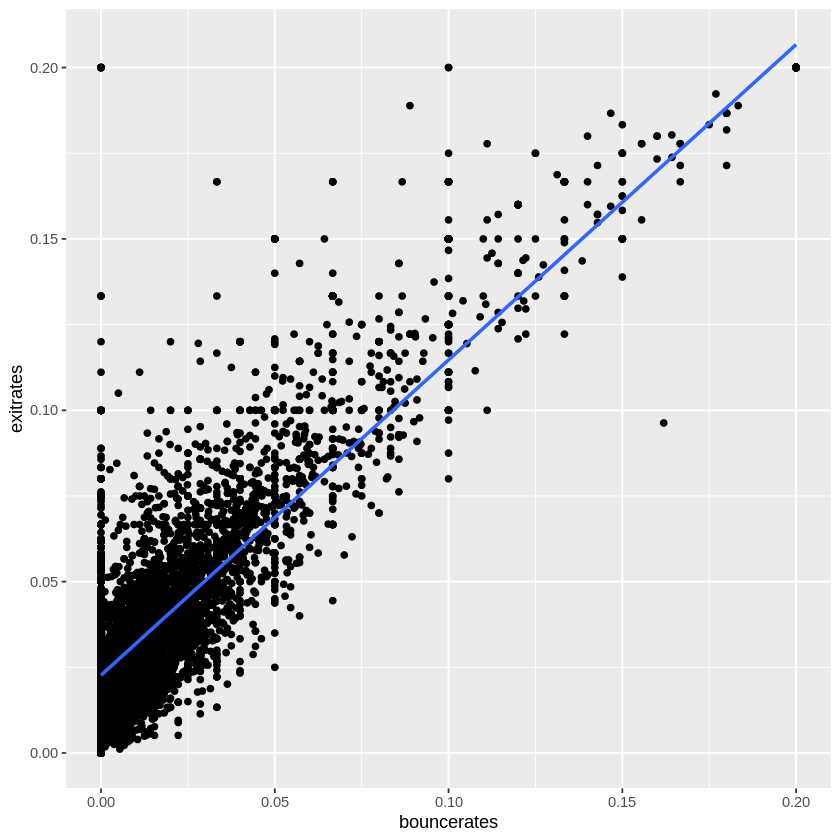

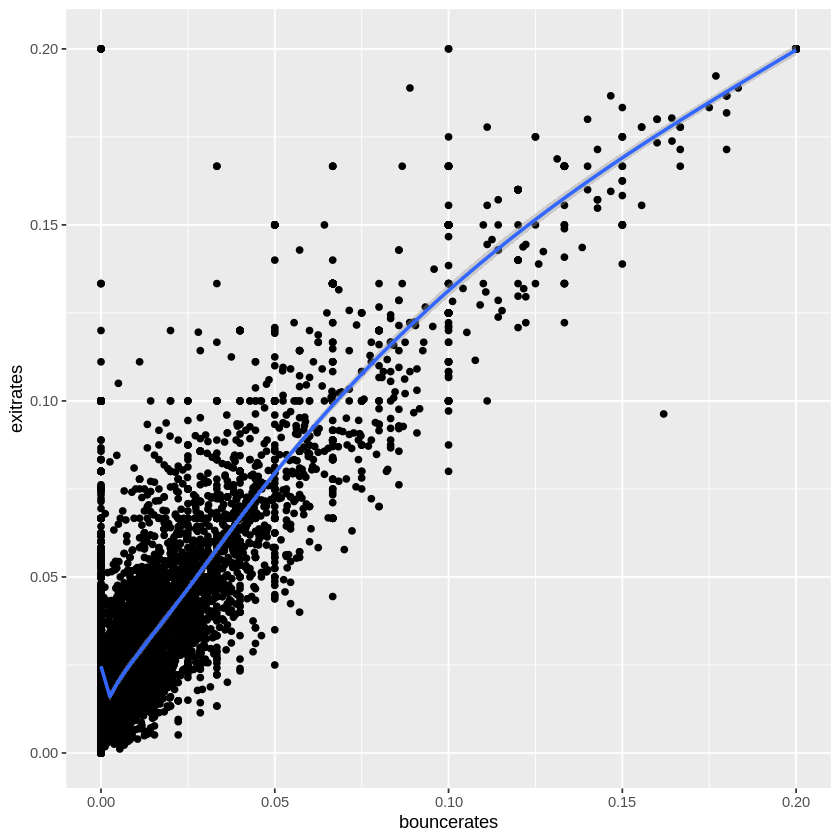

In [ ]:
# plotting scatter plots together with the best line of fit to show the relationship between bounce rates and exit rates
# Add the regression line
ggplot(shop_df, aes(x=bouncerates, y=exitrates)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(shop_df, aes(x=bouncerates, y=exitrates)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(shop_df, aes(x=bouncerates, y=exitrates)) + 
  geom_point()+
  geom_smooth()

**Observation**: There is a strong correlation between the exit rate and the bounce rate. The line of best fit is linear.

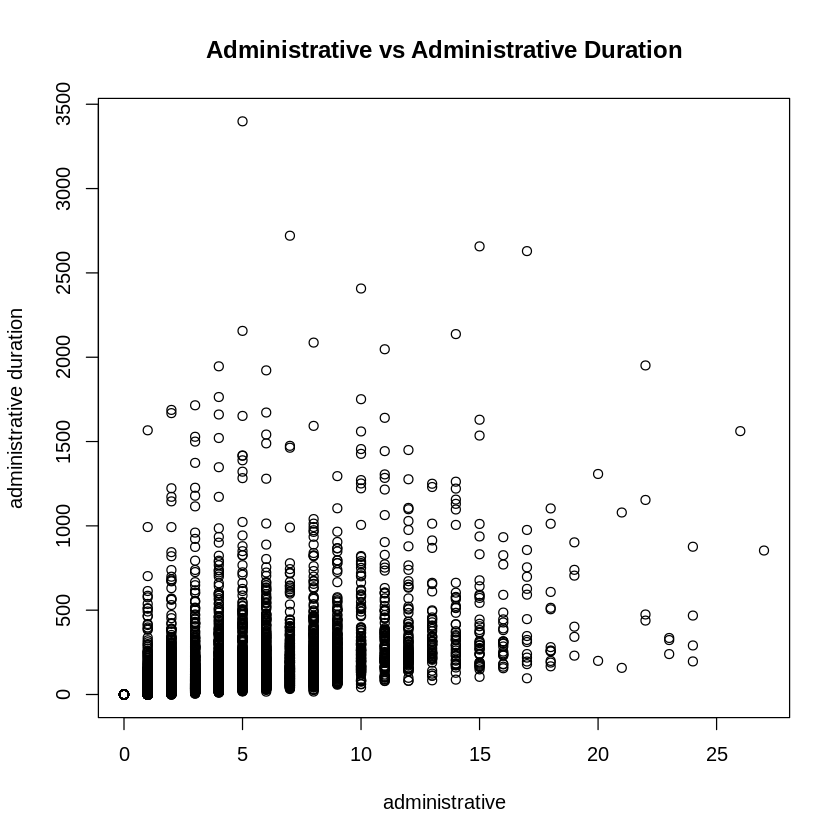

In [ ]:
# plotting a  simple scatter plot to illustrate the relationship between administrative and administrative duration
plot(shop_df$administrative,shop_df$administrative_duration, xlab="administrative", ylab="administrative duration", main="Administrative vs Administrative Duration")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



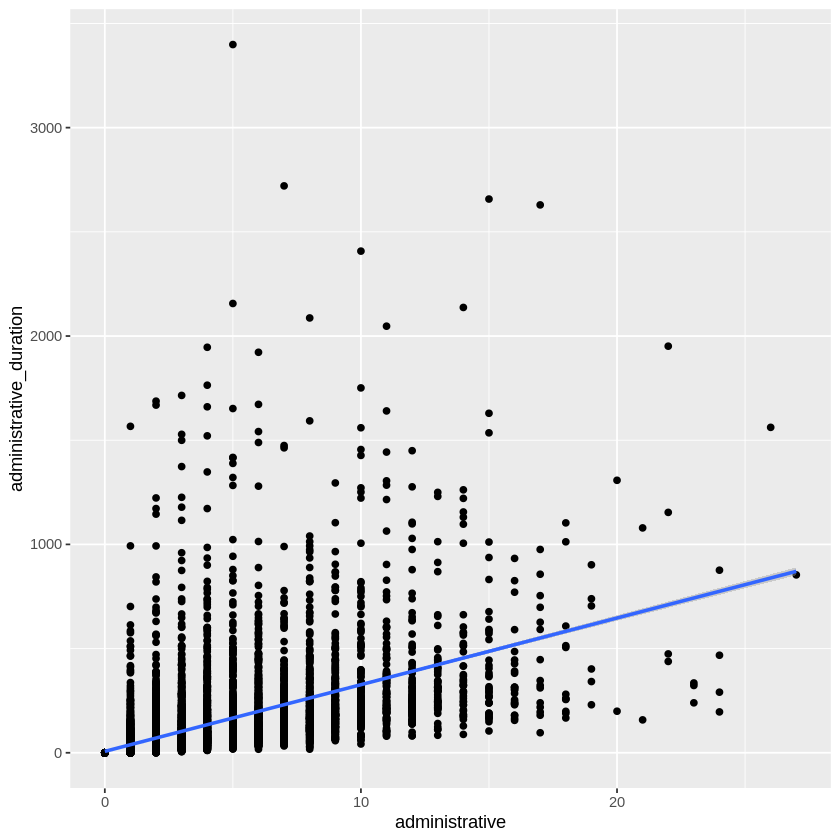

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



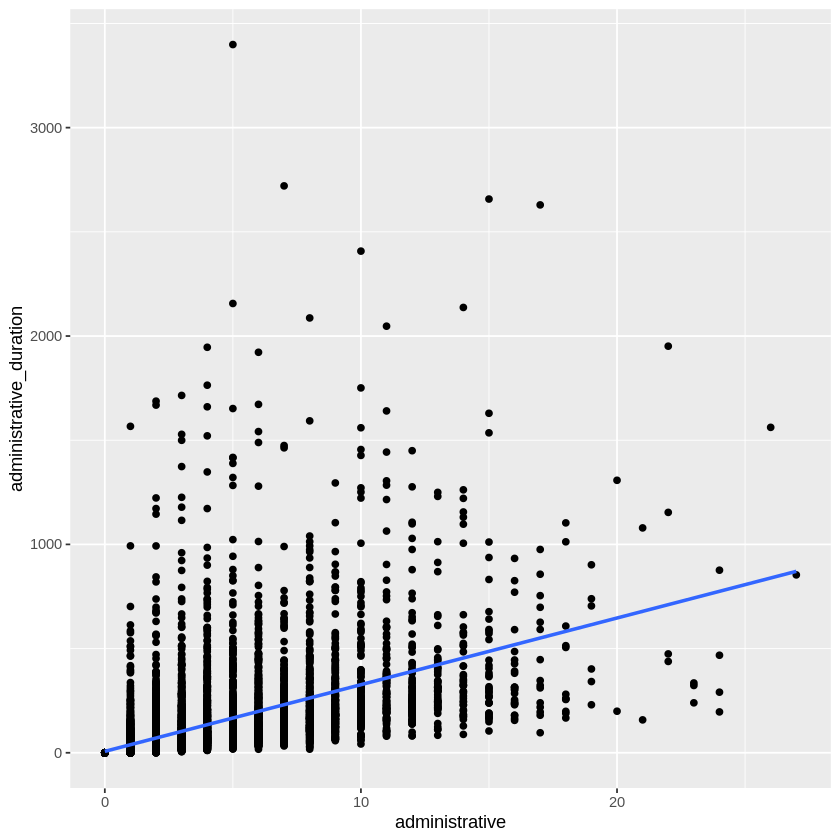

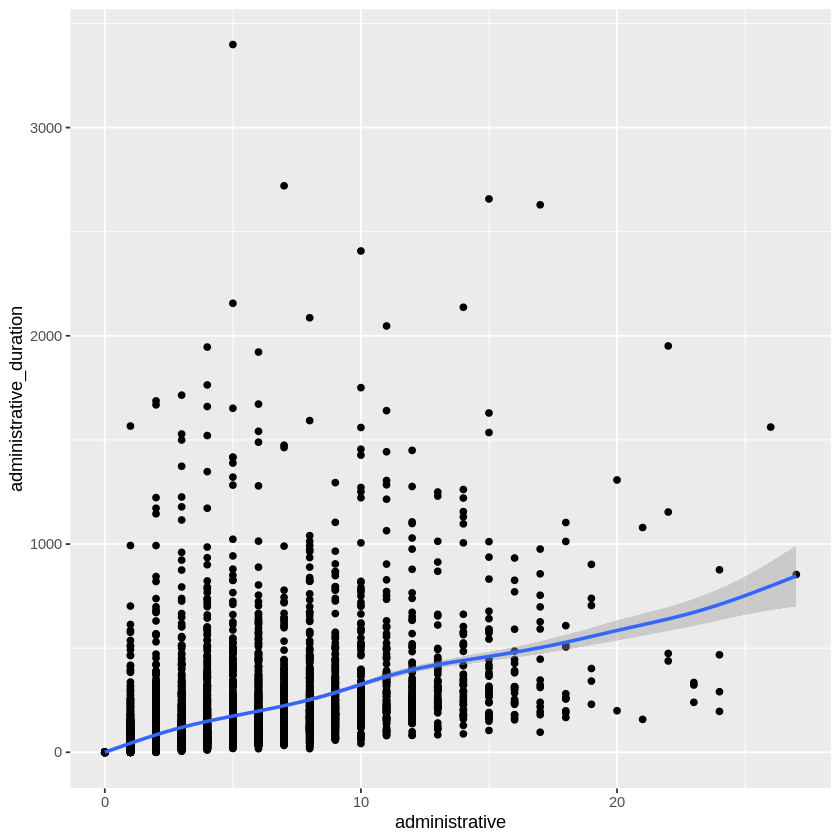

In [ ]:
# plotting scatter plots together with the best line of fit to show the relationship between administrative and administrative duration
# Add the regression line
ggplot(shop_df, aes(x=administrative, y=administrative_duration)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(shop_df, aes(x=administrative, y=administrative_duration)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(shop_df, aes(x=administrative, y=administrative_duration)) + 
  geom_point()+
  geom_smooth()

**Observation**: There is a strong relationship between the administrative visits and the administrative duration. The line of best fit would be linear. 

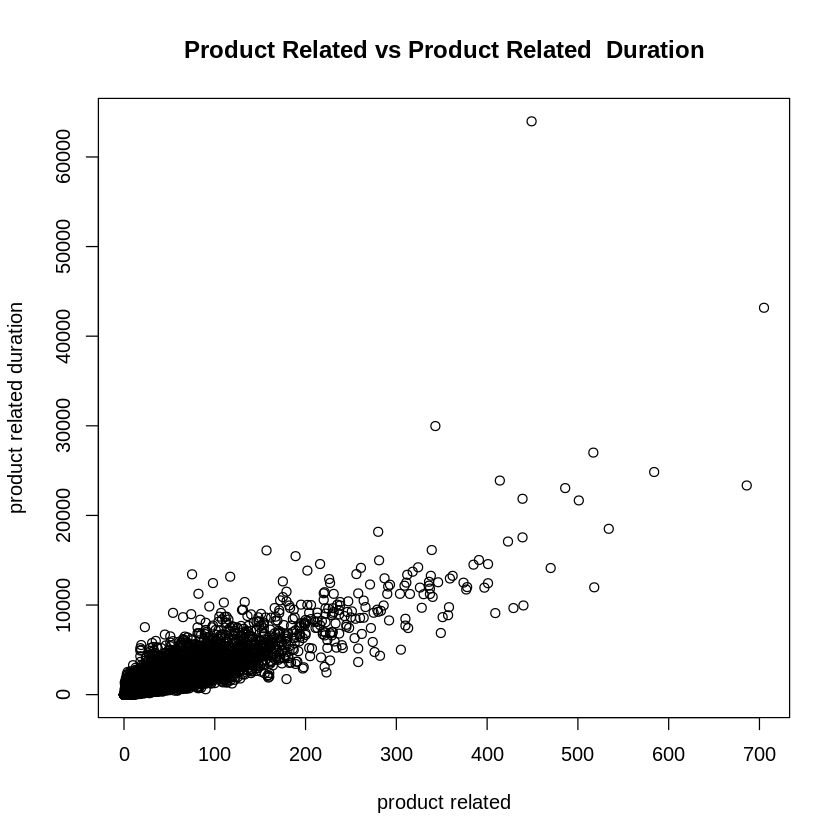

In [ ]:
# plotting a  simple scatter plot to illustrate the relationship between Product related  and Product related duration
plot(shop_df$productrelated,shop_df$productrelated_duration, xlab="product related", ylab="product related duration", main="Product Related vs Product Related  Duration")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



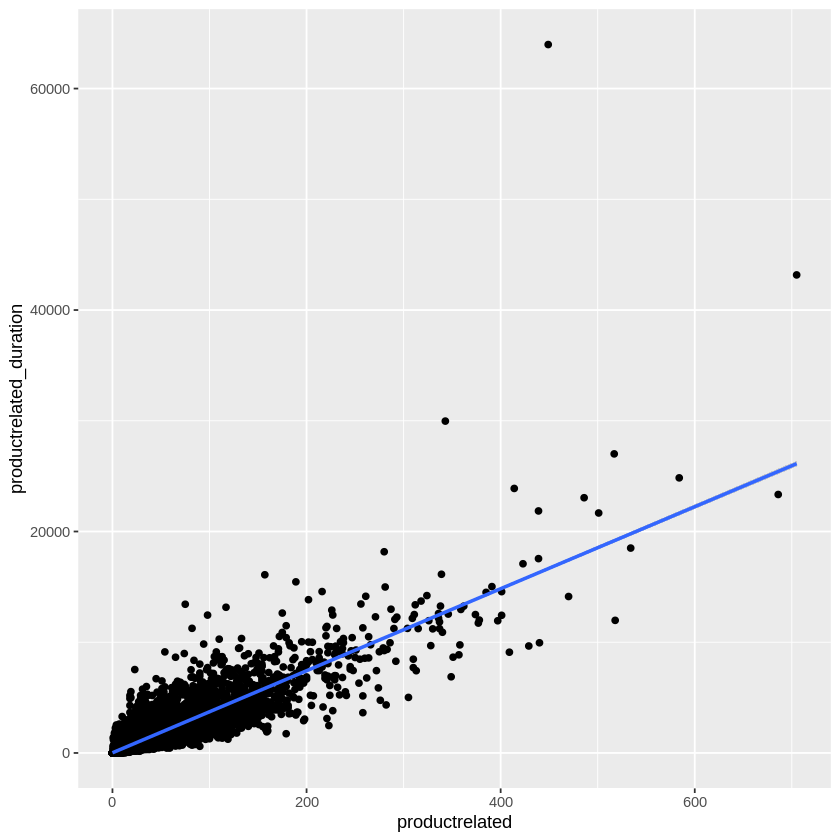

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



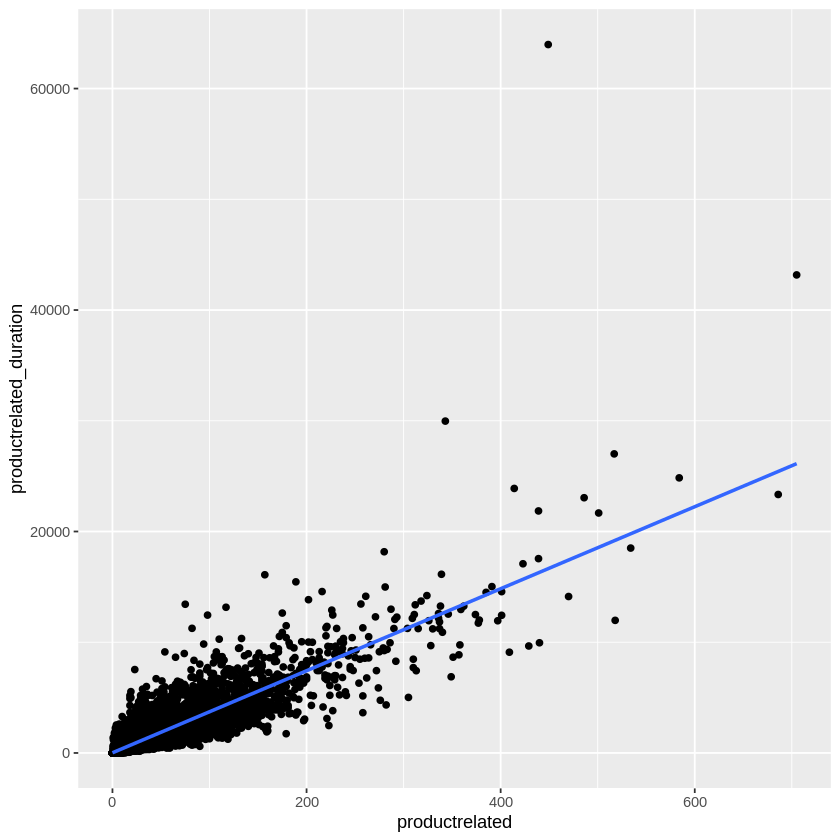

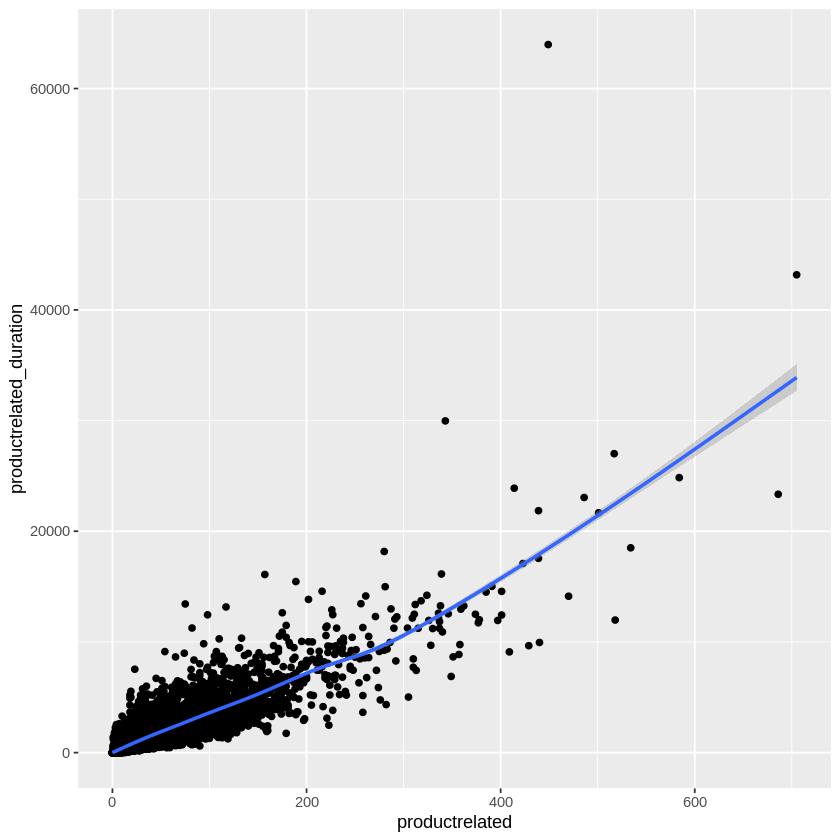

In [ ]:
# plotting scatter plots together with the best line of fit to show the relationship between product related and product related duration
# Add the regression line
ggplot(shop_df, aes(x=productrelated, y=productrelated_duration)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(shop_df, aes(x=productrelated, y=productrelated_duration)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(shop_df, aes(x=productrelated, y=productrelated_duration)) + 
  geom_point()+
  geom_smooth()

**Observation**: There is a strong relationship between product related visits and the product related duration. The line that best fits the data is linear.

In [ ]:
# summary count of the revenue received against whether the day wa sa weekend or not
table(shop_df$revenue, shop_df$weekend)

       
        FALSE TRUE
  FALSE  7934 2357
  TRUE   1409  499

**Observation**: Most of the revenue received was not on a weekend.


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




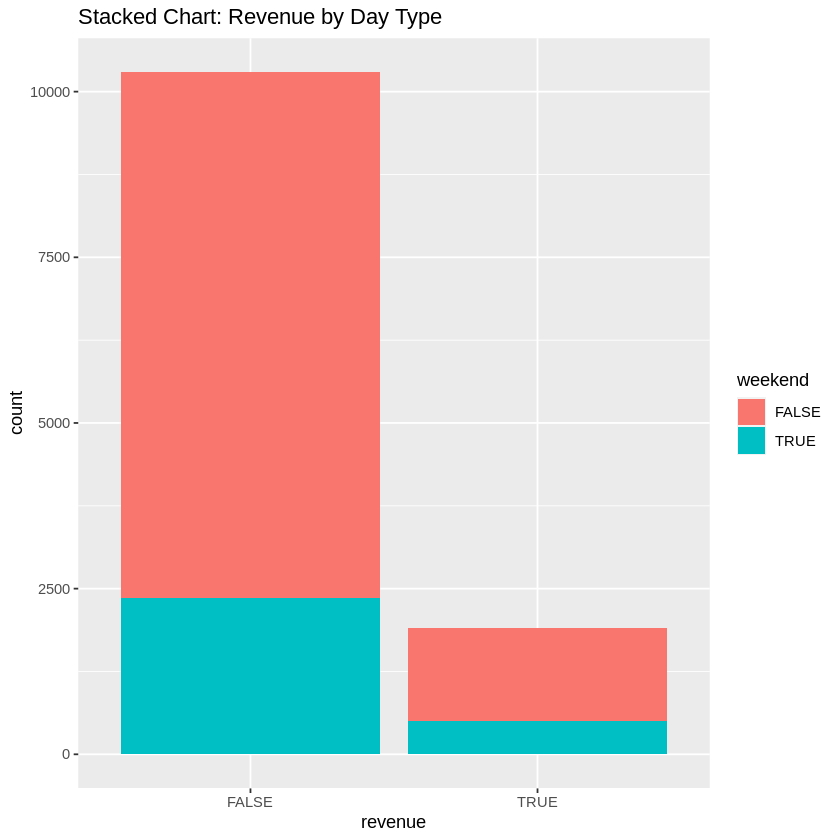

In [ ]:
library(magrittr)
shop_df %>%
ggplot(aes(revenue)) +
geom_bar(aes(fill = weekend))+
labs(title = "Stacked Chart: Revenue by Day Type")

**Observation**: This actually confirms that most of the revenue received was not on weekends.

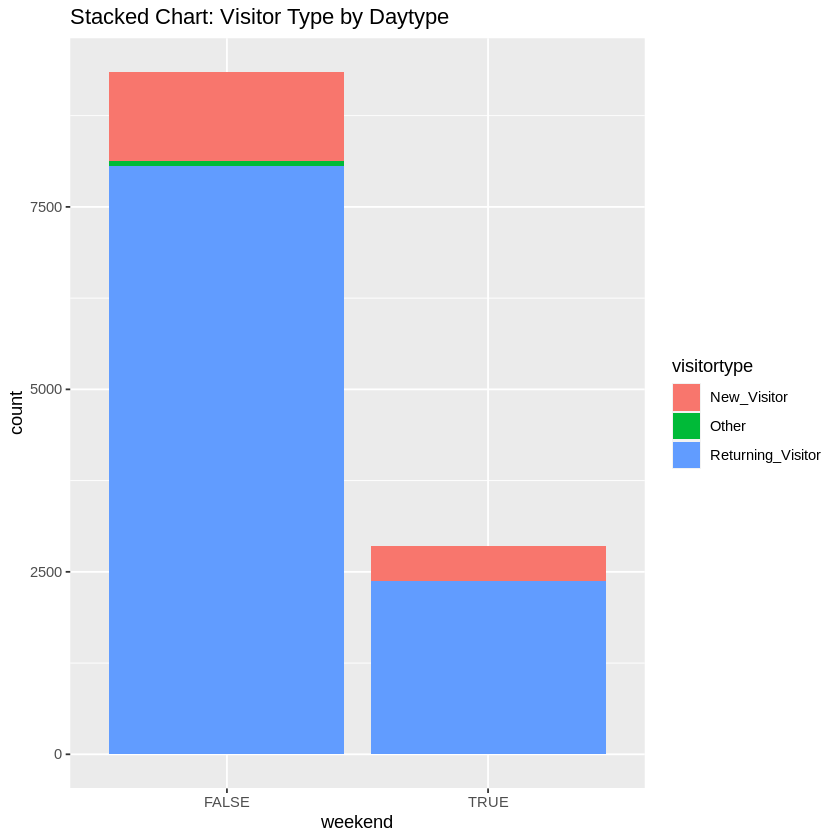

In [ ]:
shop_df %>%
ggplot(aes(weekend)) +
geom_bar(aes(fill = visitortype))+
labs(title = "Stacked Chart: Visitor Type by Daytype")

**Observation**: Most of the visit types were returning types. A large percentage of the returning visitors visited on weekdays.

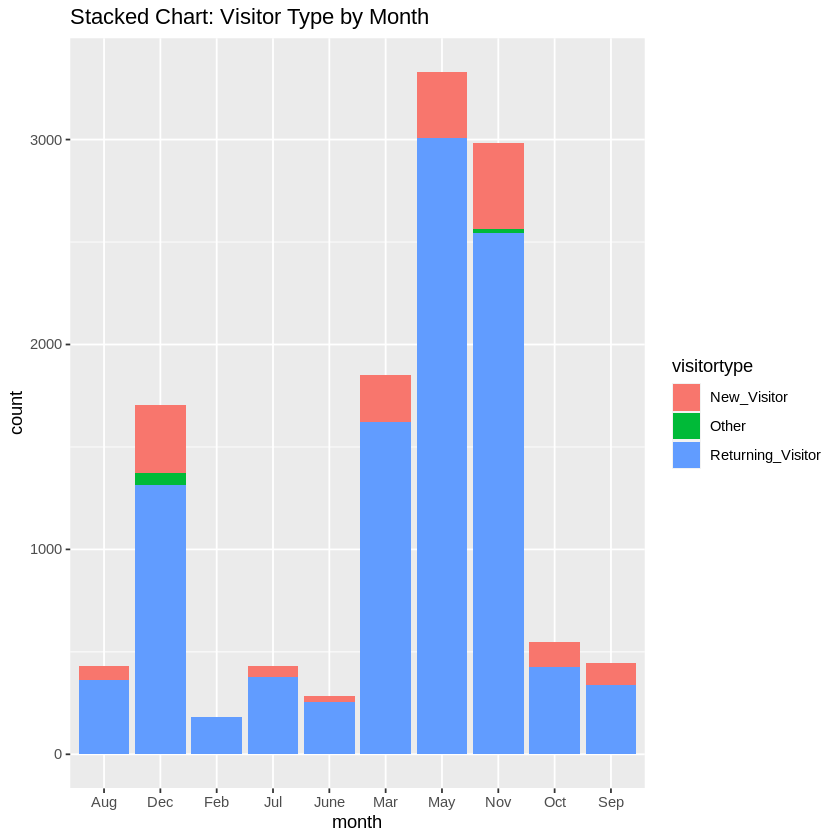

In [ ]:
shop_df %>%
ggplot(aes(month)) +
geom_bar(aes(fill = visitortype))+
labs(title = "Stacked Chart: Visitor Type by Month")

**Observation**: Most of the returning visitors visited in May.There were no new visitors in February.

In [ ]:
# summary of visitor type against the region
table(shop_df$visitortype, shop_df$region)

                   
                       1    2    3    4    5    6    7    8    9
  New_Visitor        656  149  312  139   50  121  100   74   92
  Other                8    5    8    5    0    1    2    1   51
  Returning_Visitor 4047  973 2062 1024  267  678  656  356  362

**Observation**:Most of the visitor types which is the returning visitor came from region 1 and region 3.

### Multivariate analysis

In [ ]:
# summary of the revenue received in the different months by the different visitor type
table(shop_df$revenue, shop_df$month, shop_df$visitortype)

, ,  = New_Visitor

       
         Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep
  FALSE   51  259    1   43   23  196  231  291   96   80
  TRUE    21   75    0   11    7   36   88  128   28   28

, ,  = Other

       
         Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep
  FALSE    0   45    0    0    1    0    0   19    0    0
  TRUE     0   13    0    0    0    0    0    3    0    0

, ,  = Returning_Visitor

       
         Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep
  FALSE  306 1186  178  323  232 1465 2732 1913  338  282
  TRUE    55  128    3   55   22  156  277  629   87   58


**Observation**: Most of the revenue was collected in the month of may and February registered the lowest revenue across all the visitor types.

In [ ]:
# creating dummy variables
install.packages("caret")
install.packages("lattice")
library(caret)
library(lattice)
dummy <- dummyVars(" ~ .", data = shop_df)
dummy_d <- data.frame(predict(dummy, newdata = shop_df))
#print(dummy_d)
glimpse(dummy_d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Rows: 12,199
Columns: 31
$ administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ administrative_duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ informational_duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ productrelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ productrelated_duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ bouncerates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ exitrates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ pagevalues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ specialday                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ monthAug                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ monthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ monthFeb                 

In [ ]:
# checking the data type after making the changes
sapply(dummy_d, class)

administrative      administrative_duration 
                   "numeric"                    "numeric" 
               informational       informational_duration 
                   "numeric"                    "numeric" 
              productrelated      productrelated_duration 
                   "numeric"                    "numeric" 
                 bouncerates                    exitrates 
                   "numeric"                    "numeric" 
                  pagevalues                   specialday 
                   "numeric"                    "numeric" 
                    monthAug                     monthDec 
                   "numeric"                    "numeric" 
                    monthFeb                     monthJul 
                   "numeric"                    "numeric" 
                   monthJune                     monthMar 
                   "numeric"                    "numeric" 
                    monthMay                     monthNov 
                   "numeric"                    "numeric" 
                    monthOct                     monthSep 
                   "numeric"                    "numeric" 
            operatingsystems                      browser 
                   "numeric"                    "numeric" 
                      region                  traffictype 
                   "numeric"                    "numeric" 
      visitortypeNew_Visitor             visitortypeOther 
                   "numeric"                    "numeric" 
visitortypeReturning_Visitor                 weekendFALSE 
                   "numeric"                    "numeric" 
                 weekendTRUE                 revenueFALSE 
                   "numeric"                    "numeric" 
                 revenueTRUE 
                   "numeric"

In [ ]:
# separating the dependent variable frome the independent variable
dummy_2 <- dummy_d[, -c(30:31)]
dim(dummy_2)

[1] 12199    29

In [ ]:
# isolating the dependent variable
dummy_d.class<- shop_df[, "revenue"]

In [ ]:
# rescaling the data by normalization
dummy_norm <- as.data.frame(apply(dummy_2, 2, function(x) (x -
min(x))/(max(x)-min(x))))
summary(dummy_norm)

 administrative    administrative_duration informational   
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0002941       1st Qu.:0.0000  
 Median :0.03704   Median :0.0029414       Median :0.0000  
 Mean   :0.08667   Mean   :0.0243201       Mean   :0.0212  
 3rd Qu.:0.14815   3rd Qu.:0.0281638       3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.0000  
 informational_duration productrelated    productrelated_duration
 Min.   :0.0000000      Min.   :0.00000   Min.   :0.000000       
 1st Qu.:0.0003921      1st Qu.:0.01135   1st Qu.:0.003042       
 Median :0.0003921      Median :0.02553   Median :0.009543       
 Mean   :0.0140518      Mean   :0.04547   Mean   :0.018891       
 3rd Qu.:0.0003921      3rd Qu.:0.05390   3rd Qu.:0.023112       
 Max.   :1.0000000      Max.   :1.00000   Max.   :1.000000       
  bouncerates        exitrates         pagevalues        specialday     
 Min.   :0.00000   Min.   :0.00000   Min.   :

## Implementing the solution

### K means clustering

In [ ]:
output_k <- kmeans(dummy_norm, 4)

In [ ]:
# checking the number of data points in each cluster
output_k$size

[1] 4888 3009 1738 2564

In [ ]:
# getting the cluster center data points in each attribute
output_k$centers

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,⋯,monthSep,operatingsystems,browser,region,traffictype,visitortypeNew_Visitor,visitortypeOther,visitortypeReturning_Visitor,weekendFALSE,weekendTRUE
1,0.08639450,0.02402860,0.02114873,0.015043868,0.04265476,0.01779909,0.10972447,0.2226461,0.01277009,0.008797054,⋯,0.06955810,0.1565642,0.1104064,0.2697422,0.1311482,0.0000000,0.002864157,0.9971358,0.7790507,0.2209493
2,0.07127999,0.02007303,0.01814002,0.011302122,0.03928168,0.01607367,0.13554209,0.2507710,0.01265110,0.225589897,⋯,0.00000000,0.1616579,0.1144345,0.2663260,0.1868605,0.0000000,0.000000000,1.0000000,0.7909605,0.2090395
3,0.09434002,0.02738163,0.01383295,0.007872451,0.02561026,0.01004326,0.02526057,0.1031686,0.03126250,0.019677791,⋯,0.06214039,0.1679270,0.1294112,0.3017837,0.1708861,0.9741082,0.025891830,0.0000000,0.7220944,0.2779056
4,0.10004622,0.02778458,0.02988495,0.019576040,0.07157533,0.03027375,0.10103992,0.1984887,0.01790254,0.000000000,⋯,0.00000000,0.1621908,0.1059867,0.2492687,0.1847648,0.0000000,0.008580343,0.9914197,0.7410296,0.2589704


In [ ]:
# K-Means Cluster Analysis
fit <- kmeans(dummy_norm, 4) # 5 cluster solution
# get cluster means
aggregate(dummy_norm,by=list(fit$cluster),FUN=mean)
# append cluster assignment
dummy_norm <- data.frame(dummy_norm, fit$cluster)

Group.1,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,⋯,monthSep,operatingsystems,browser,region,traffictype,visitortypeNew_Visitor,visitortypeOther,visitortypeReturning_Visitor,weekendFALSE,weekendTRUE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09049155,0.02518258,0.02309440,0.015814238,0.05237897,0.02215951,0.10978578,0.2195497,0.01411290,⋯,0.04678980,0.1559744,0.1103342,0.2633245,0.1465908,0.0000000,0.001759015,0.9982410,1,0
2,0.09314322,0.02706681,0.01356286,0.007790822,0.02550861,0.01007757,0.02811417,0.1088582,0.03318895,⋯,0.06729264,0.1739325,0.1416275,0.3095657,0.1798040,0.9499218,0.050078247,0.0000000,1,0
3,0.09203496,0.02558730,0.02449521,0.016384511,0.04704343,0.01916769,0.08728349,0.1847150,0.01747125,⋯,0.03361345,0.1610644,0.1029704,0.2682511,0.1608801,0.1677171,0.002450980,0.8298319,0,1
4,0.06761594,0.01926421,0.01682423,0.010404632,0.03781274,0.01548144,0.14193483,0.2589451,0.01183969,⋯,0.00000000,0.1640456,0.1169468,0.2625000,0.1896727,0.0000000,0.000000000,1.0000000,1,0


### Hierarchical clustering

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



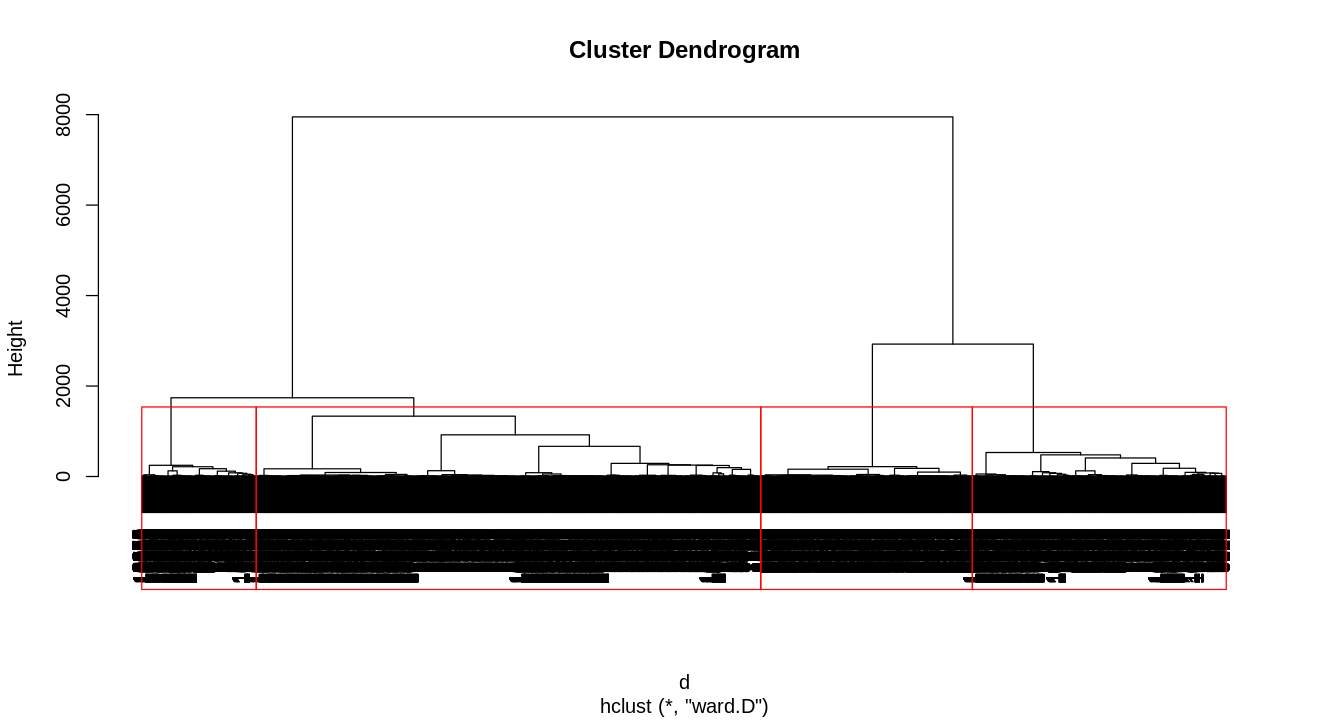

In [ ]:
# Ward Hierarchical Clustering
d <- dist(dummy_norm, method = "euclidean") # distance matrix
fit <- hclust(d, method="ward")
plot(fit) # display dendogram
groups <- cutree(fit, k=5) # cut tree into 5 clusters
# draw dendogram with red borders around the 5 clusters
rect.hclust(fit, k=4, border="red")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.6)... Done.
Bootstrap (r = 0.7)... Done.
Bootstrap (r = 0.8)... Done.
Bootstrap (r = 0.9)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.1)... Done.
Bootstrap (r = 1.2)... Done.
Bootstrap (r = 1.3)... Done.
Bootstrap (r = 1.4)... Done.


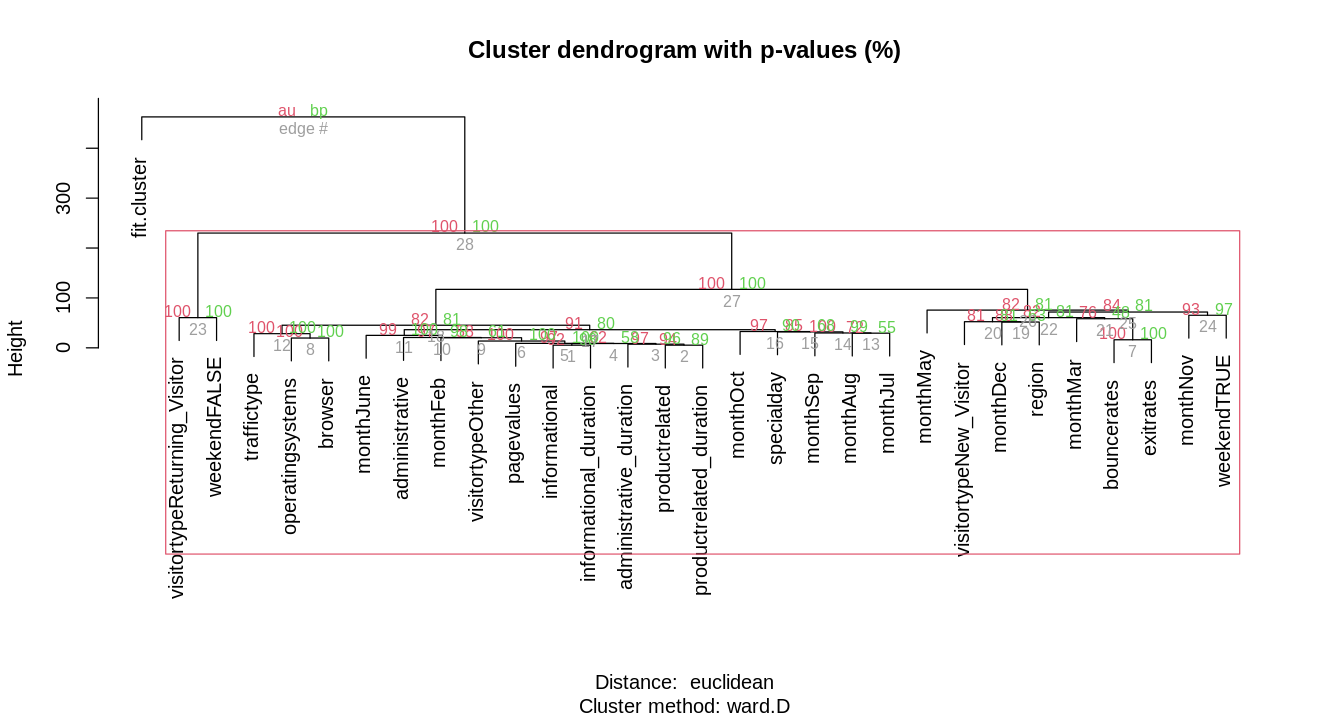

In [ ]:
# Ward Hierarchical Clustering with Bootstrapped p values
install.packages("pvclust")
library(pvclust)
fit <- pvclust(dummy_norm, method.hclust="ward",
   method.dist="euclidean")
plot(fit) # dendogram with p values
# add rectangles around groups highly supported by the data
pvrect(fit, alpha=.95)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



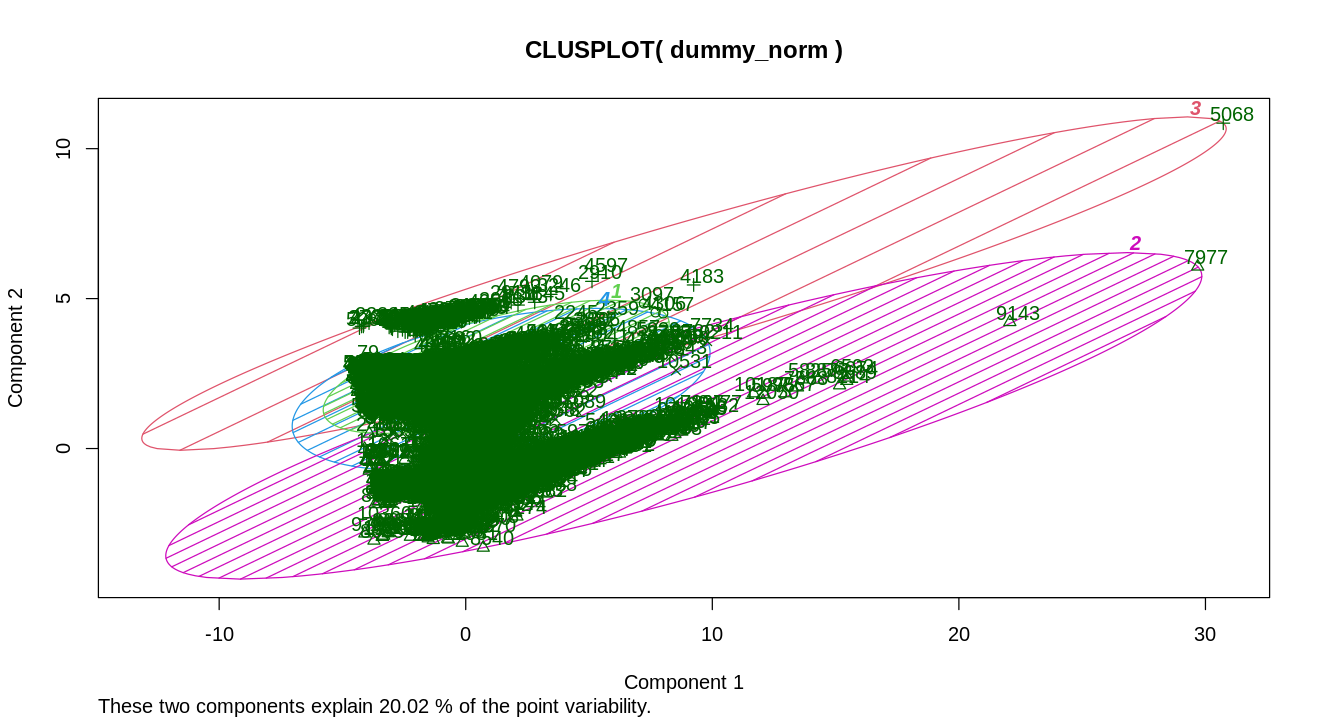

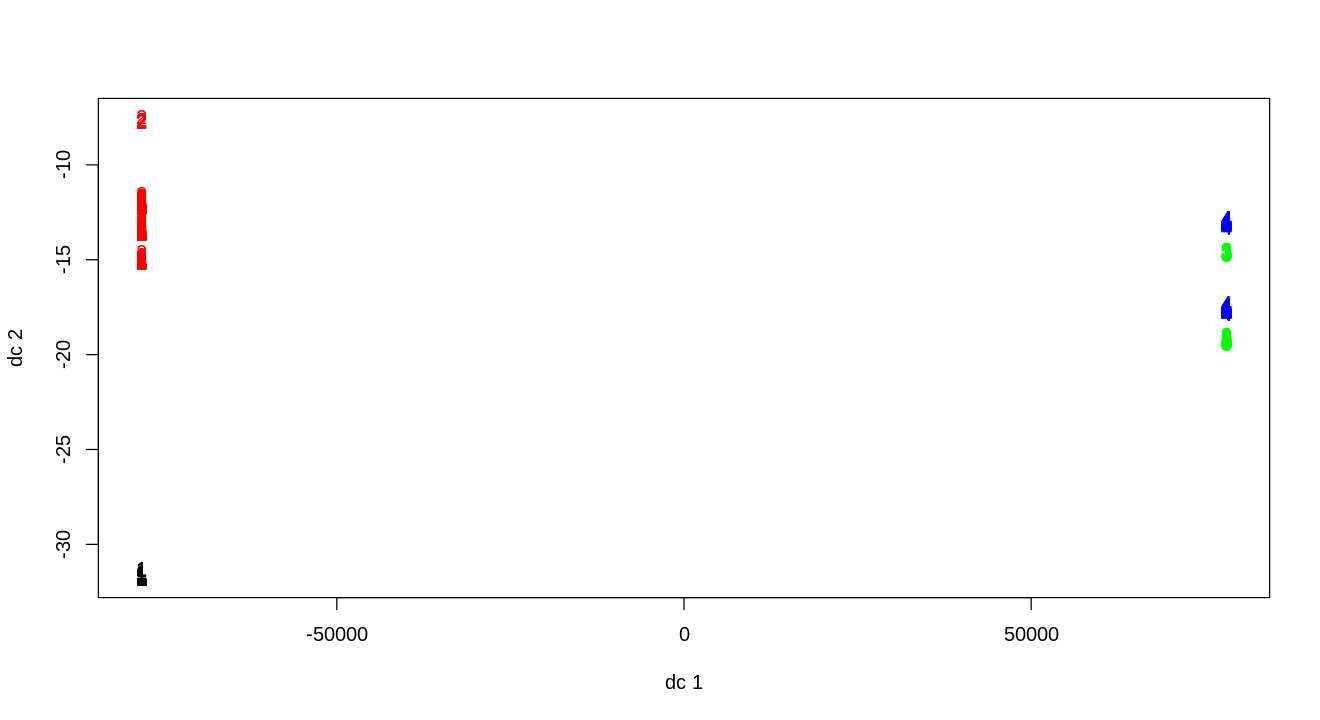

In [ ]:
# K-Means Clustering with 4 clusters
fit <- kmeans(dummy_norm, 4)

# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
install.packages("cluster")
library(cluster)
clusplot(dummy_norm, fit$cluster, color=TRUE, shade=TRUE,
   labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
install.packages("fpc")
library(fpc)
plotcluster(dummy_norm, fit$cluster)